# Lab Report

In [10]:
%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sympy as sp
from scipy.optimize import fsolve
from uncertainties import ufloat
from uncertainties import unumpy as unp

from sympy.utilities.autowrap import ufuncify

# Constants

k = sp.sympify('1.4')    # [-]      # Gas capacity ratio
R = sp.sympify('287.05') # [J/kg K] # Universal Gas Constant
Cp = R*k/(k-1)           # [J/kg K] # Const pressure Heat Capacity
Cv = R/(k-1)             # [J/kg K] # Const pressure Heat Capacity

# Sympy

# Entry Section
M1 = sp.Symbol("M_{1}", positive=True)
p1 = sp.Symbol('p_{1}', positive=True)
po1 = sp.Symbol('p_{0;1}', positive=True)
T1 = sp.Symbol('T_{1}', positive=True)
To1 = sp.Symbol('T_{0;1}', positive=True)
rho1 = sp.Symbol(r'\rho_1', positive=True)
A1 = sp.Symbol(r'A_1', positive=True)

# Choke Section
M2 = sp.Symbol("M_{2}", positive=True)
p2 = sp.Symbol('p_{2}', positive=True)
po2 = sp.Symbol('p_{0;2}', positive=True)
T2 = sp.Symbol('T_{2}', positive=True)
To2 = sp.Symbol('T_{0;2}', positive=True)
rho2 = sp.Symbol(r'\rho_2', positive=True)
A2 = sp.Symbol(r'A_2', positive=True)

# Just Before Shock
M3 = sp.Symbol("M_{3}", positive=True)
p3 = sp.Symbol('p_{3}', positive=True)
po3 = sp.Symbol('p_{0;3}', positive=True)
T3 = sp.Symbol('T_{3}', positive=True)
To3 = sp.Symbol('T_{0;3}', positive=True)
rho3 = sp.Symbol(r'\rho_3', positive=True)
A3 = sp.Symbol(r'A_3', positive=True)

# Just After Shock
M4 = sp.Symbol("M_{4}", positive=True)
p4 = sp.Symbol('p_{4}', positive=True)
po4 = sp.Symbol('p_{0;4}', positive=True)
T4 = sp.Symbol('T_{4}', positive=True)
To4 = sp.Symbol('T_{0;4}', positive=True)
rho4 = sp.Symbol(r'\rho_4', positive=True)
A4 = sp.Symbol(r'A_4', positive=True)

# Region at exit
M5 = sp.Symbol("M_{5}", positive=True)
p5 = sp.Symbol('p_{5}', positive=True)
po5 = sp.Symbol('p_{0;5}', positive=True)
T5 = sp.Symbol('T_{5}', positive=True)
To5 = sp.Symbol('T_{0;5}', positive=True)
rho5 = sp.Symbol(r'\rho_5', positive=True)
A5 = sp.Symbol(r'A_5', positive=True)

# Region at exit
M = sp.Symbol("M", positive=True)
p = sp.Symbol('p', positive=True)
po = sp.Symbol('p_{0}', positive=True)
T = sp.Symbol('T', positive=True)
To = sp.Symbol('T_{0}', positive=True)
rho = sp.Symbol(r'\rho', positive=True)
A = sp.Symbol(r'A', positive=True)

## Relation between Chamber (1) and Choke Point (2)
p2_p1_relation = sp.Eq(p2/p1,(1 + (k-1)/2)**(-k/(k-1)))
p2_p1 = np.vectorize(sp.lambdify(M1, sp.solve(p2_p1_relation, p2/p1)[0], modules=['numpy']))
po2_po1_relation = sp.Eq(po2/po1,1)
po2_po1 = np.vectorize(sp.lambdify(M1, sp.solve(po2_po1_relation, po2/po1)[0], modules=['numpy']))
T2_T1_relation = sp.Eq(T2/T1, (1 + (k-1)/2)**(-1))
T2_T1 = np.vectorize(sp.lambdify(M1, sp.solve(T2_T1_relation, T2/T1)[0], modules=['numpy']))
To2_To1_relation = sp.Eq(To2/To1, 1)
To2_To1 = np.vectorize(sp.lambdify(M1, sp.solve(To2_To1_relation, To2/To1)[0], modules=['numpy']))
rho2_rho1_relation = sp.Eq(rho2/rho1, (1 + (k-1)/2)**(-1/(k-1))) 
rho2_rho1 = np.vectorize(sp.lambdify(M1, sp.solve(rho2_rho1_relation, rho2/rho1)[0], modules=['numpy']))    

## Relation between Choke Point (2) and Just before Normal Shock (3)
p3_p2_relation = sp.Eq(p3/p2, ((1 + M3*M3*(k-1)/2)/(1 + (k-1)/2))**(-k/(k-1)))
p3_p2 = np.vectorize(sp.lambdify(M3, sp.solve( p3_p2_relation, p3/p2)[0], modules=['numpy']))
po3_po2_relation = sp.Eq(po3/po2, 1)
po3_po2 = np.vectorize(sp.lambdify(M3, sp.solve(po3_po2_relation, po3/po2)[0], modules=['numpy']))
T3_T2_relation = sp.Eq(T3/T2, ((1 + M3*M3*(k-1)/2)/(1 + (k-1)/2))**(-1))
T3_T2 = np.vectorize(sp.lambdify(M3, sp.solve(T3_T2_relation, T3/T2)[0], modules=['numpy']))
To3_To2_relation = sp.Eq(To3/To2, 1)
To3_To2 = np.vectorize(sp.lambdify(M3, sp.solve(To3_To2_relation, To3/To2)[0], modules=['numpy']))    
rho3_rho2_relation = sp.Eq(rho3/rho2, ((1 + M3*M3*(k-1)/2)/(1 + (k-1)/2))**(-1/(k-1)))
rho3_rho2 = np.vectorize(sp.lambdify(M3, sp.solve(rho3_rho2_relation, rho3/rho2)[0], modules=['numpy']))    
term1 = ( (k+1)/2           )**( -(k+1)/(k-1)/2)
term2 = ( (1 + M3*M3*(k-1)/2) )**(  (k+1)/(k-1)/2)
A3_A2_relation = sp.Eq(A3/A2, term1*term2/M3)
A3_A2 = np.vectorize(sp.lambdify(M3, sp.solve(A3_A2_relation, A3/A2)[0], modules=['numpy']))

## Relations across the Normal Shock  (Regions (3) & (4))
M4_M3_relation = sp.Eq(M4**2, ( (k-1)*M3**2 + 2 )/( 2*k*M3**2 - (k-1) ))
M4_M3 = np.vectorize(sp.lambdify(M3, (sp.solve(M4_M3_relation, M4)[1])/M3, modules=['numpy']))
p4_p3_relation = sp.Eq(p4/p3, ( 2*k*M3**2 - (k-1) )/(k+1) )
p4_p3 = np.vectorize(sp.lambdify(M3, sp.solve(p4_p3_relation, p4/p3)[0], modules=['numpy']))
term1 = ( (k+1)*M3**2 )/( (k-1)*M3**2 + 2 )
term2 = (k+1)/(2*k*M3**2 - (k-1) )
po4_po3_relation = sp.Eq(po4/po3, term1**(k/(k-1)) * term2**(1/(k-1)))
po4_po3 = np.vectorize(sp.lambdify(M3, sp.solve(po4_po3_relation, po4/po3)[0], modules=['numpy']))
term1 = (2*k*M3**2 - (k-1))
term2 = ((k-1)*M3**2+2)
term3 = (k+1)**2*M3**2
T4_T3_relation = sp.Eq(T4/T3, term1*term2/term3)
T4_T3 = np.vectorize(sp.lambdify(M3, sp.solve(T4_T3_relation, T4/T3)[0], modules=['numpy']))
To4_To3_relation = sp.Eq(To4/To3, 1)
To4_To3 = np.vectorize(sp.lambdify(M3, sp.solve(To4_To3_relation, To4/To3)[0], modules=['numpy']))
rho4_rho3_relation = sp.Eq(rho4/rho3, ((k+1)*M3**2)/((k-1)*M3**2+2))
rho4_rho3 = np.vectorize(sp.lambdify(M3, sp.solve(rho4_rho3_relation, rho4/rho3)[0], modules=['numpy']))
A4_A3_relation = sp.Eq(A4/A3, 1)
A4_A3 = np.vectorize(sp.lambdify(M3, sp.solve(A4_A3_relation, A4/A3)[0], modules=['numpy']))

M3_M4 = np.vectorize(sp.lambdify(M4, sp.simplify((sp.solve(M4_M3_relation, M3)[1])/M4), modules=['numpy']))
# M3_M4(0.5)*0.5

## Relation between Just After Normal Shock (4) and Exit (5)
p5_p4_relation = sp.Eq(p5/p4, ((1 + M4*M4*(k-1)/2)/(1 + M5*M5*(k-1)/2))**(k/(k-1)))
p5_p4 = np.vectorize(sp.lambdify((M4,M5), sp.solve(p5_p4_relation, p5/p4)[0], modules=['numpy']))
po5_po4_relation = sp.Eq(po5/po4, 1)
po5_po4 = np.vectorize(sp.lambdify((M4,M5), sp.solve(po5_po4_relation, po5/po4)[0], modules=['numpy']))
T5_T4_relation = sp.Eq(T5/T4, ((1 + M4*M4*(k-1)/2)/(1 + M5*M5*(k-1)/2))**(1))
T5_T4 = np.vectorize(sp.lambdify((M4,M5), sp.solve(T5_T4_relation, T5/T4)[0], modules=['numpy']))
To5_To4_relation = sp.Eq(To5/To4, 1)
To5_To4 = np.vectorize(sp.lambdify((M4,M5), sp.solve(To5_To4_relation, To5/To4)[0], modules=['numpy']))    
rho5_rho4_relation = sp.Eq(rho5/rho4, ((1 + M4*M4*(k-1)/2)/(1 + M5*M5*(k-1)/2))**(1/(k-1)))
rho5_rho4 = np.vectorize(sp.lambdify((M4,M5), sp.solve(rho5_rho4_relation, rho5/rho4)[0], modules=['numpy']))    
term1 = ( (1 + M5*M5*(k-1)/2) )**(  (k+1)/(k-1)/2)
term2 = ( (1 + M4*M4*(k-1)/2) )**(  (k+1)/(k-1)/2)
A5_A4_relation = sp.Eq((term1/term2)*(M4/M5), A5/A4)
A5_A4 = np.vectorize(sp.lambdify((M4,M5), sp.solve(A5_A4_relation, A5/A4)[0], modules=['numpy']))

In [11]:
# Lab Equipment - de Laval 

D_lab = np.array([2.00, 2.13, 2.26, 2.39, 2.52, 2.66, 2.79])*1e-3 # [m]
x_lab = np.array([6, 8.48, 10.96, 13.44, 15.92, 18.59, 21.97])*1e-3 # [m]

A_lab = D_lab**2 # [m2]
A_lab = A_lab/A_lab[0]
A_lab = A_lab.tolist()
A_lab 

[1.0,
 1.134225,
 1.2769,
 1.4280250000000003,
 1.5876000000000001,
 1.7689000000000001,
 1.946025]

In [12]:
data_df = pd.read_csv("./LabObservations.csv")
data_df.columns=["Series","input_pressure","gauge_1","gauge_2","gauge_3","gauge_4",
                 "gauge_5","gauge_6","gauge_7","gauge_8","output_pressure","mass_flow_rate","Label",]


#Convert values to absolute value
data_df["abs_1"] = data_df["gauge_1"] + 1.013
data_df["abs_2"] = data_df["gauge_2"] + 1.013
data_df["abs_3"] = data_df["gauge_3"] + 1.013
data_df["abs_4"] = data_df["gauge_4"] + 1.013
data_df["abs_5"] = data_df["gauge_5"] + 1.013
data_df["abs_6"] = data_df["gauge_6"] + 1.013
data_df["abs_7"] = data_df["gauge_7"] + 1.013
data_df["abs_8"] = data_df["gauge_8"] + 1.013
data_df["abs_output"] = data_df["output_pressure"] + 1.013
data_df["abs_input"] = data_df["input_pressure"] + 1.013

#data_df["abs_stag"] = data_df["abs_2"] / 0.528
data_df["abs_stag"] = data_df["abs_input"]

data_df["abs_output"] = data_df["abs_output"]/data_df["abs_stag"] 
data_df["abs_input"] = data_df["abs_input"]/data_df["abs_stag"] 
data_df["Rp_1"] = data_df["abs_1"]/data_df["abs_stag"] 
data_df["Rp_2"] = data_df["abs_2"]/data_df["abs_stag"] 
data_df["Rp_3"] = data_df["abs_3"]/data_df["abs_stag"] 
data_df["Rp_4"] = data_df["abs_4"]/data_df["abs_stag"] 
data_df["Rp_5"] = data_df["abs_5"]/data_df["abs_stag"] 
data_df["Rp_6"] = data_df["abs_6"]/data_df["abs_stag"] 
data_df["Rp_7"] = data_df["abs_7"]/data_df["abs_stag"] 
data_df["Rp_8"] = data_df["abs_8"]/data_df["abs_stag"] 

#data_df[data_df["Series"]=="Supersonic_78"]



## Relation between Chamber (1) and Choke Point (2)

| Relation | Relation between Choke Point (1) and Region (2) |
| --- | :----------- |
| Mach Number   | $$M_{1} = 0$$ $$M_{2} = 1$$ |
| (Static) Pressure | $$\frac{p_{2}}{p_{1}} = {\left[  \frac{ 1 }{ 1 + \frac{\gamma-1}{2} }  \right]}^{\frac{\gamma}{\gamma-1}} = 0.528$$
| Stagnant Pressure | $$\frac{p_{0;2}}{p_{0;1}} = 1$$
| (Static) Temperature | $$\frac{T_{2}}{T_{1}} = {\left[  \frac{ 1 }{ 1 + \frac{\gamma-1}{2} }  \right]} = 0.833$$
| Stagnation Temperature | $$ \frac{T_{0;2}}{T_{0;1}} = 1 $$
| Density | $$\frac{\rho_{2}}{\rho_{1}} = {\left[  \frac{ 1 }{ 1 + \frac{\gamma-1}{2} }  \right]}^{ \frac{1}{\gamma - 1} } = 0.633$$
| Area | $$A_1 = \infty$$

## Relation between Choke Point (2) and Just before Normal Shock (3)

| Relation | Equation |
| --- | ----------- |
| Mach Number   | $$M_{2} = 1$$ |
| (Static) Pressure | $$\frac{p_{3}}{p_{2}} = {\left[  \frac{ 1 + \frac{\gamma-1}{2}{M_{3}}^2 }{ 1 + \frac{\gamma-1}{2} }  \right]}^{\frac{-\gamma}{\gamma-1}}$$
| Stagnant Pressure | $$\frac{p_{0;3}}{p_{0;2}} = 1$$
| (Static) Temperature | $$\frac{T_{3}}{T_{2}} = {\left[  \frac{ 1 + \frac{\gamma-1}{2}{M_{3}}^2 }{ 1 + \frac{\gamma-1}{2} }  \right]}^{-1}$$
| Stagnation Temperature | $$ \frac{T_{0;3}}{T_{0;2}} = 1 $$
| Density | $$\frac{\rho_{3}}{\rho_{2}} = {\left[  \frac{ 1 + \frac{\gamma-1}{2}{M_{3}}^2 }{ 1 + \frac{\gamma-1}{2} }  \right]}^{ \frac{-1}{\gamma - 1} }$$
| Area | $$\frac{A_3}{A_2} = {\left(\frac{\gamma+1}{2}\right)}^{-\frac{\gamma+1}{2\left(\gamma-1\right)}}\frac{{\left[1 + \frac{\gamma-1}{2}{M_3}^2 \right]}^{\frac{\gamma+1}{2(\gamma-1)}}}{M_3}$$

## Relations across the Normal Shock  (Regions (3) & (4))

| Relation | Equation |
| --- | ----------- |
| Mach Number   | $${{M_{4}}^{2}} = \frac{(\gamma-1){{M_{3}}^{2}}+2}{2 \gamma {{M_{3}}^{2}} - (\gamma - 1)}$$ |
| (Static) Pressure | $$ \frac{p_{4}}{p_{3}} = \frac{2 \gamma {{M_{3}}^{2}} - (\gamma - 1)}{\gamma+1} $$
| Stagnation Pressure | $$\frac{p_{0;4}}{p_{0;3}} = {\left[\frac{(\gamma + 1){{M_{3}}^2}}{(\gamma - 1){{M_{3}}^2} + 2}\right]}^{\frac{\gamma}{\gamma-1}}{\left[\frac{(\gamma + 1)}{2\gamma{{M_{3}}^2} - (\gamma - 1)}\right]}^{\frac{1}{\gamma-1}}$$ | 
| (Static) Temperature | $$\frac{T_{4}}{T_{3}} = \frac{\left[ 2 \gamma {{M_3}^2} - (\gamma - 1) \right]\left[ (\gamma - 1) {{M_3}^2} + 2 \right]}{\left[ {(\gamma + 1)}^2 {{M_3}^2} \right]} $$
| Stagnation temperature | $$\frac{T_{0;4}}{T_{0;3}} = 1$$
| Density | $$\frac{\rho_4}{\rho_3} = \frac{(\gamma + 1){M_3}^2}{(\gamma - 1){M_3}^2 + 2}$$ |
| Area | $$\frac{A_4}{A_3} = 1$$ |

## Relation between Just After Normal Shock (4) and Exit (5)

| Relation | Equation |
| --- | ----------- |
| Mach Number   |  |
| (Static) Pressure | $$\frac{p_{5}}{p_{4}} = {\left[  \frac{ 1 + \frac{\gamma-1}{2}{M_{4}}^2 }{ 1 + \frac{\gamma-1}{2}{M_{5}}^2 }  \right]}^{\frac{-\gamma}{\gamma-1}}$$
| Stagnant Pressure | $$\frac{p_{0;5}}{p_{0;4}} = 1$$
| (Static) Temperature | $$\frac{T_{5}}{T_{4}} = {\left[  \frac{ 1 + \frac{\gamma-1}{2}{M_{4}}^2 }{ 1 + \frac{\gamma-1}{2} }  \right]}^{-1}$$
| Stagnation Temperature | $$ \frac{T_{0;5}}{T_{0;4}} = 1 $$
| Density | $$\frac{\rho_{5}}{\rho_{4}} = {\left[  \frac{ 1 + \frac{\gamma-1}{2}{M_{4}}^2 }{ 1 + \frac{\gamma-1}{2} }  \right]}^{ \frac{-1}{\gamma - 1} }$$
| Area | $$\frac{A_5}{A_4} = \frac{M_4}{M_5} {\left[ \frac{{1 + \frac{\gamma-1}{2}{M_5}^2 }}{{1 + \frac{\gamma-1}{2}{M_4}^2 }} \right]}^{\frac{\gamma+1}{2(\gamma-1)}}$$


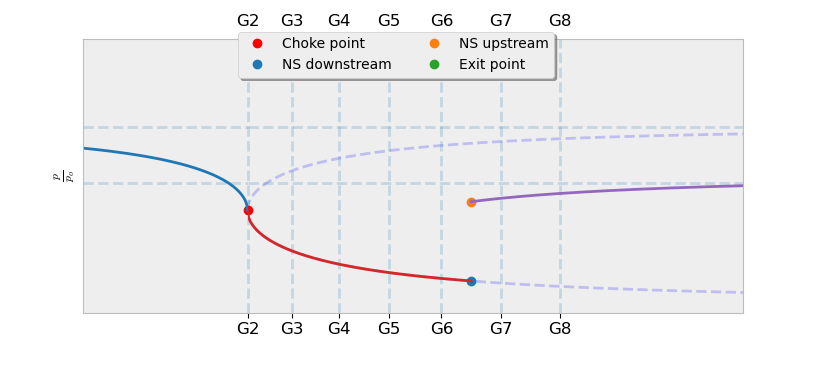

In [13]:
po_slider = widgets.FloatSlider(
    value=6, min=0, max=9.0, step=0.1,
    description='po', disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True, readout_format='.2f')
pe_slider = widgets.FloatSlider(
    value=4.103, min=0, max=9.0, step=0.1,
    description='pe', disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True, readout_format='.2f')

with plt.style.context('bmh'):
    f, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                                figsize=(8.25,11.75/3),
                                gridspec_kw={'width_ratios': [1.5-1, 2.5-1]},
                                sharey=True)


#@widgets.interact(po_user=po_slider, 
#                  pe_user=pe_slider, 
#                  Ae_user=widgets.fixed(1.5*A_lab[-1]))    
def plot_supersonic_tunnel(po_user=6, pe_user=4.103, Ae_user=1.5*A_lab[-1]):
    
    global f
    global ax1
    global ax2
    
    global A_lab
    
    ax1.cla()
    ax2.cla()    
    
    df = pd.DataFrame()
    df['region'] = [1, 2, 3, 4, 5]

    # First, we must find the value of normal shock that will 
    from scipy.optimize import fsolve
    
    def find_normal_shock(x):
        M3 = x[0]
        M5 = x[1] 
        p5 = p5_p4(M4_M3(M3)*M3,M5)*p4_p3(M3)*p3_p2(M3)*p2_p1(1)*po_user
        A5 = A5_A4(M4_M3(M3)*M3,M5)*A4_A3(M3)*A3_A2(M3)*1
        return [A5 - Ae_user, p5 - pe_user]
    root = fsolve(find_normal_shock, [3, 0.01])
    
    # Mach Number 
    # ===================
    M1 = 0
    M2 = 1  
    M3 = root[0]
    M4 = M4_M3(M3)*M3
    M5 = root[1]
    df['M'] = [M1, M2, M3, M4, M5]
    
    # Stagnation Pressure 
    # ===============
    po1 = po_user
    po2 = po2_po1(M1)*po1
    po3 = po3_po2(M3)*po2
    po4 = po4_po3(M3)*po3
    po5 = po5_po4(M4,M5)*po4
    df['po'] = [po1, po2, po3, po4, po5]   
    
    # Static Pressure 
    # ===============
    p1 = po_user
    p2 = p2_p1(M1)*p1
    p3 = p3_p2(M3)*p2
    p4 = p4_p3(M3)*p3
    p5 = p5_p4(M4,M5)*p4
    df['p'] = [p1, p2, p3, p4, p5]
    
    # Area
    # ====
    A1 = np.inf
    A2 = 1
    A3 = A3_A2(M3)*A2
    A4 = A4_A3(M3)*A3
    A5 = A5_A4(M4,M5)*A4
    df['A'] = [A1, A2, A3, A4, A5]
    df = df.set_index('region')
    
    # For region plotting
    term1 = ( (k+1)/2           )**( -(k+1)/(k-1)/2)
    term2 = ( (1 + M*M*(k-1)/2) )**(  (k+1)/(k-1)/2)
    isentropic_area_relation = sp.Eq( term1*term2/M, A/A2)
    cd_A_A2 = sp.lambdify(M, sp.solve(isentropic_area_relation, A/A2)[0], modules=['numpy']) 
    isentropic_pressure_relation = sp.Eq((1 + M*M*(k-1)/2)**(-k/(k-1)),p/po)
    cd_p_po = sp.lambdify(M, sp.solve(isentropic_pressure_relation, p/po)[0], modules=['numpy'])  
      
    # For region plotting    
    region12_M = np.linspace(0.01,       1,          1000) # Converging section
    region23_M = np.linspace(1,          df['M'][3], 1000) # Diverging section before NS
    region45_M = np.linspace(df['M'][4], df['M'][5], 1000) # Diverging section after NS

    # For region plotting        
    #left_A_ratio = max(1.5, int(np.ceil(df['A'][2])))
    #right_A_ratio = max(2, int(np.ceil(df['A'][5])))

    # Plot Relationship between To2/To1 and M1
    with plt.style.context('bmh'):
       
        # Plot isentropic solutions
        ax2.plot(cd_A_A2(np.linspace(1, 13, 1000)), 
                 cd_p_po(np.linspace(1, 13, 1000)), 
                 'b--', alpha=0.2) 
        ax2.plot(cd_A_A2(np.linspace(0.01, 1, 1000)), 
                 cd_p_po(np.linspace(0.01, 1, 1000)), 
                 'b--', alpha=0.2)    
        
      
            
        # Draw lines that guide you to the correct spot
        ax1.axhline(y=1, linestyle='--', alpha=0.2)
        ax2.axhline(y=1, linestyle='--', alpha=0.2)    
        ax1.axhline(y=pe_user/df['po'][1], linestyle='--', alpha=0.2)
        ax2.axhline(y=pe_user/df['po'][1], linestyle='--', alpha=0.2)     
        #ax2.axvline(x=Ae_user, linestyle='--', alpha=0.2)            

        # Draw lines that guide you to the correct spot
        ax1.axvline(x=A_lab[0], linestyle='--', alpha=0.2) 
        for i in A_lab:
            ax2.axvline(x=i, linestyle='--', alpha=0.2)     
        ax1.set_xticks([])
        ax2.tick_params(labelbottom=True,labeltop=True)
        ax2.set_xticks(A_lab) 
        ax2.set_xticklabels(["G2","G3","G4","G5","G6","G7","G8"], 
                            fontsize=12)
        
        
        

        # Plot important points      
        ax1.plot([df['A'][1]], [df['p'][1]/df['po'][1]], 'ro', label='Chamber')         
        ax1.plot([df['A'][2]], [df['p'][2]/df['po'][1]], 'ro', label='Choke point')         
        ax2.plot([df['A'][2]], [df['p'][2]/df['po'][1]], 'ro', label='Choke point')         
        ax2.plot([df['A'][3]], [df['p'][3]/df['po'][1]], 'o', label='NS downstream')         
        ax2.plot([df['A'][4]], [df['p'][4]/df['po'][1]], 'o', label='NS upstream')         
        ax2.plot([df['A'][5]], [df['p'][5]/df['po'][1]], 'o', label='Exit point')         

        # Plot regions      
        ax1.plot(cd_A_A2(region12_M), cd_p_po(region12_M), '-')         
        ax2.plot(cd_A_A2(region23_M), cd_p_po(region23_M), '-')         
        ax2.plot(cd_A_A2(region45_M) * (1/cd_A_A2(df['M'][4])) * cd_A_A2(df['M'][3]), 
                 cd_p_po(region45_M) * (df['po'][5]/df['po'][1]), '-')           
        
        
        
        #ax1.set_xticks([], [])
        
        # Titles of graph   
        #ax1.xlabel("X axis label")
        ax1.set_ylabel(r"$\frac{p}{p_o}$")
        
        # The converging section is reversed    
        ax1.invert_xaxis() 
  
        # Hide the axis lines in the middle
        ax1.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False) 
        #ax1.xaxis.set_ticks([])
        ax2.yaxis.set_ticks([])
        
        # display the graph    
        ax1.set_ylim(top=1.5)
        ax2.set_ylim(top=1.5)
        ax1.set_xlim(left=1.5, right=1)
        ax2.set_xlim(left=1.0, right=2.5)

    
        # Legends
        #ax1.legend()    
        #ax2.legend()  
        #ax2.legend(loc="right")#, bbox_to_anchor=(0.8, -0.8))
        ax2.legend(loc='upper center', bbox_to_anchor=(0.3, 1.05),
          ncol=2, fancybox=True, shadow=True)
        # Minimize spacing between subplots
        f.subplots_adjust(left=0.1, right=0.9,  
                          top=0.9, bottom=0.2,
                          wspace=0, hspace=0)
        #plt.show()
        
        
plot_supersonic_tunnel()

In [48]:
series_number = 1
series_selector = f"Series_{series_number}"
first_shock = 2
second_shock = first_shock + 1
label_selector = f"NS{first_shock}{second_shock}"


def plot_maker(series_selector, first_shock , second_shock, label_selector):
    
    import ipywidgets as widgets
    import matplotlib.pyplot as plt

    import numpy as np
    import pandas as pd
    import sympy as sp
    from scipy.optimize import fsolve
    from uncertainties import ufloat
    from uncertainties import unumpy as unp

    from sympy.utilities.autowrap import ufuncify

    # Constants

    k = sp.sympify('1.4')    # [-]      # Gas capacity ratio
    R = sp.sympify('287.05') # [J/kg K] # Universal Gas Constant
    Cp = R*k/(k-1)           # [J/kg K] # Const pressure Heat Capacity
    Cv = R/(k-1)             # [J/kg K] # Const pressure Heat Capacity

    # Sympy

    # Entry Section
    M1 = sp.Symbol("M_{1}", positive=True)
    p1 = sp.Symbol('p_{1}', positive=True)
    po1 = sp.Symbol('p_{0;1}', positive=True)
    T1 = sp.Symbol('T_{1}', positive=True)
    To1 = sp.Symbol('T_{0;1}', positive=True)
    rho1 = sp.Symbol(r'\rho_1', positive=True)
    A1 = sp.Symbol(r'A_1', positive=True)

    # Choke Section
    M2 = sp.Symbol("M_{2}", positive=True)
    p2 = sp.Symbol('p_{2}', positive=True)
    po2 = sp.Symbol('p_{0;2}', positive=True)
    T2 = sp.Symbol('T_{2}', positive=True)
    To2 = sp.Symbol('T_{0;2}', positive=True)
    rho2 = sp.Symbol(r'\rho_2', positive=True)
    A2 = sp.Symbol(r'A_2', positive=True)
    
    # Just Before Shock
    M3 = sp.Symbol("M_{3}", positive=True)
    p3 = sp.Symbol('p_{3}', positive=True)
    po3 = sp.Symbol('p_{0;3}', positive=True)
    T3 = sp.Symbol('T_{3}', positive=True)
    To3 = sp.Symbol('T_{0;3}', positive=True)
    rho3 = sp.Symbol(r'\rho_3', positive=True)
    A3 = sp.Symbol(r'A_3', positive=True)

    # Just After Shock
    M4 = sp.Symbol("M_{4}", positive=True)
    p4 = sp.Symbol('p_{4}', positive=True)
    po4 = sp.Symbol('p_{0;4}', positive=True)
    T4 = sp.Symbol('T_{4}', positive=True)
    To4 = sp.Symbol('T_{0;4}', positive=True)
    rho4 = sp.Symbol(r'\rho_4', positive=True)
    A4 = sp.Symbol(r'A_4', positive=True)

    # Region at exit
    M5 = sp.Symbol("M_{5}", positive=True)
    p5 = sp.Symbol('p_{5}', positive=True)
    po5 = sp.Symbol('p_{0;5}', positive=True)
    T5 = sp.Symbol('T_{5}', positive=True)
    To5 = sp.Symbol('T_{0;5}', positive=True)
    rho5 = sp.Symbol(r'\rho_5', positive=True)
    A5 = sp.Symbol(r'A_5', positive=True)

    # Region at exit
    M = sp.Symbol("M", positive=True)
    p = sp.Symbol('p', positive=True)
    po = sp.Symbol('p_{0}', positive=True)
    T = sp.Symbol('T', positive=True)
    To = sp.Symbol('T_{0}', positive=True)
    rho = sp.Symbol(r'\rho', positive=True)
    A = sp.Symbol(r'A', positive=True)

    ## Relation between Chamber (1) and Choke Point (2)
    p2_p1_relation = sp.Eq(p2/p1,(1 + (k-1)/2)**(-k/(k-1)))
    p2_p1 = np.vectorize(sp.lambdify(M1, sp.solve(p2_p1_relation, p2/p1)[0], modules=['numpy']))
    po2_po1_relation = sp.Eq(po2/po1,1)
    po2_po1 = np.vectorize(sp.lambdify(M1, sp.solve(po2_po1_relation, po2/po1)[0], modules=['numpy']))
    T2_T1_relation = sp.Eq(T2/T1, (1 + (k-1)/2)**(-1))
    T2_T1 = np.vectorize(sp.lambdify(M1, sp.solve(T2_T1_relation, T2/T1)[0], modules=['numpy']))
    To2_To1_relation = sp.Eq(To2/To1, 1)
    To2_To1 = np.vectorize(sp.lambdify(M1, sp.solve(To2_To1_relation, To2/To1)[0], modules=['numpy']))
    rho2_rho1_relation = sp.Eq(rho2/rho1, (1 + (k-1)/2)**(-1/(k-1))) 
    rho2_rho1 = np.vectorize(sp.lambdify(M1, sp.solve(rho2_rho1_relation, rho2/rho1)[0], modules=['numpy']))    

    ## Relation between Choke Point (2) and Just before Normal Shock (3)
    p3_p2_relation = sp.Eq(p3/p2, ((1 + M3*M3*(k-1)/2)/(1 + (k-1)/2))**(-k/(k-1)))
    p3_p2 = np.vectorize(sp.lambdify(M3, sp.solve( p3_p2_relation, p3/p2)[0], modules=['numpy']))
    po3_po2_relation = sp.Eq(po3/po2, 1)
    po3_po2 = np.vectorize(sp.lambdify(M3, sp.solve(po3_po2_relation, po3/po2)[0], modules=['numpy']))
    T3_T2_relation = sp.Eq(T3/T2, ((1 + M3*M3*(k-1)/2)/(1 + (k-1)/2))**(-1))
    T3_T2 = np.vectorize(sp.lambdify(M3, sp.solve(T3_T2_relation, T3/T2)[0], modules=['numpy']))
    To3_To2_relation = sp.Eq(To3/To2, 1)
    To3_To2 = np.vectorize(sp.lambdify(M3, sp.solve(To3_To2_relation, To3/To2)[0], modules=['numpy']))    
    rho3_rho2_relation = sp.Eq(rho3/rho2, ((1 + M3*M3*(k-1)/2)/(1 + (k-1)/2))**(-1/(k-1)))
    rho3_rho2 = np.vectorize(sp.lambdify(M3, sp.solve(rho3_rho2_relation, rho3/rho2)[0], modules=['numpy']))    
    term1 = ( (k+1)/2           )**( -(k+1)/(k-1)/2)
    term2 = ( (1 + M3*M3*(k-1)/2) )**(  (k+1)/(k-1)/2)
    A3_A2_relation = sp.Eq(A3/A2, term1*term2/M3)
    A3_A2 = np.vectorize(sp.lambdify(M3, sp.solve(A3_A2_relation, A3/A2)[0], modules=['numpy']))

    ## Relations across the Normal Shock  (Regions (3) & (4))
    M4_M3_relation = sp.Eq(M4**2, ( (k-1)*M3**2 + 2 )/( 2*k*M3**2 - (k-1) ))
    M4_M3 = np.vectorize(sp.lambdify(M3, (sp.solve(M4_M3_relation, M4)[1])/M3, modules=['numpy']))
    p4_p3_relation = sp.Eq(p4/p3, ( 2*k*M3**2 - (k-1) )/(k+1) )
    p4_p3 = np.vectorize(sp.lambdify(M3, sp.solve(p4_p3_relation, p4/p3)[0], modules=['numpy']))
    term1 = ( (k+1)*M3**2 )/( (k-1)*M3**2 + 2 )
    term2 = (k+1)/(2*k*M3**2 - (k-1) )
    po4_po3_relation = sp.Eq(po4/po3, term1**(k/(k-1)) * term2**(1/(k-1)))
    po4_po3 = np.vectorize(sp.lambdify(M3, sp.solve(po4_po3_relation, po4/po3)[0], modules=['numpy']))
    term1 = (2*k*M3**2 - (k-1))
    term2 = ((k-1)*M3**2+2)
    term3 = (k+1)**2*M3**2
    T4_T3_relation = sp.Eq(T4/T3, term1*term2/term3)
    T4_T3 = np.vectorize(sp.lambdify(M3, sp.solve(T4_T3_relation, T4/T3)[0], modules=['numpy']))
    To4_To3_relation = sp.Eq(To4/To3, 1)
    To4_To3 = np.vectorize(sp.lambdify(M3, sp.solve(To4_To3_relation, To4/To3)[0], modules=['numpy']))
    rho4_rho3_relation = sp.Eq(rho4/rho3, ((k+1)*M3**2)/((k-1)*M3**2+2))
    rho4_rho3 = np.vectorize(sp.lambdify(M3, sp.solve(rho4_rho3_relation, rho4/rho3)[0], modules=['numpy']))
    A4_A3_relation = sp.Eq(A4/A3, 1)
    A4_A3 = np.vectorize(sp.lambdify(M3, sp.solve(A4_A3_relation, A4/A3)[0], modules=['numpy']))

    M3_M4 = np.vectorize(sp.lambdify(M4, sp.simplify((sp.solve(M4_M3_relation, M3)[1])/M4), modules=['numpy']))
    # M3_M4(0.5)*0.5
    
    ## Relation between Just After Normal Shock (4) and Exit (5)
    p5_p4_relation = sp.Eq(p5/p4, ((1 + M4*M4*(k-1)/2)/(1 + M5*M5*(k-1)/2))**(k/(k-1)))
    p5_p4 = np.vectorize(sp.lambdify((M4,M5), sp.solve(p5_p4_relation, p5/p4)[0], modules=['numpy']))
    po5_po4_relation = sp.Eq(po5/po4, 1)
    po5_po4 = np.vectorize(sp.lambdify((M4,M5), sp.solve(po5_po4_relation, po5/po4)[0], modules=['numpy']))
    T5_T4_relation = sp.Eq(T5/T4, ((1 + M4*M4*(k-1)/2)/(1 + M5*M5*(k-1)/2))**(1))
    T5_T4 = np.vectorize(sp.lambdify((M4,M5), sp.solve(T5_T4_relation, T5/T4)[0], modules=['numpy']))
    To5_To4_relation = sp.Eq(To5/To4, 1)
    To5_To4 = np.vectorize(sp.lambdify((M4,M5), sp.solve(To5_To4_relation, To5/To4)[0], modules=['numpy']))    
    rho5_rho4_relation = sp.Eq(rho5/rho4, ((1 + M4*M4*(k-1)/2)/(1 + M5*M5*(k-1)/2))**(1/(k-1)))
    rho5_rho4 = np.vectorize(sp.lambdify((M4,M5), sp.solve(rho5_rho4_relation, rho5/rho4)[0], modules=['numpy']))    
    term1 = ( (1 + M5*M5*(k-1)/2) )**(  (k+1)/(k-1)/2)
    term2 = ( (1 + M4*M4*(k-1)/2) )**(  (k+1)/(k-1)/2)
    A5_A4_relation = sp.Eq((term1/term2)*(M4/M5), A5/A4)
    A5_A4 = np.vectorize(sp.lambdify((M4,M5), sp.solve(A5_A4_relation, A5/A4)[0], modules=['numpy']))
    
    
    
    with plt.style.context('bmh'):
        f, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                                    figsize=(8.25,11.75/5),
                                    dpi=300,
                                    gridspec_kw={'width_ratios': [3.0-1, 3.5-1]},
                                    sharey=True)
    
    ax1.cla() # Clear the grid in the converging section
    ax2.cla() # Clear the grid in the diverging section

    f.subplots_adjust(left=0.1, right=0.9,  
                      top=0.9, bottom=0.2,
                      wspace=0, hspace=0) # Minimize spacing between subplots to zero (appearance of one plot)
    ax1.invert_xaxis() # The converging section x axis is reversed    
        
    # Y axis label   
    ax1.set_ylabel(r"$\frac{p}{p_o}$")     
    f.supxlabel(r'$\frac{A}{A^*}$')
    #ax2.set_xlabel(r"Diverging")   
    #ax1.set_xlabel(r"Converging")   

    secax1 = ax1.secondary_xaxis('top', functions=(lambda x: x, lambda x: x))
    secax2 = ax2.secondary_xaxis('top', functions=(lambda x: x, lambda x: x))    
    
    # Hide the axis lines in the middle
    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False) 
    ax2.yaxis.set_ticks([])
    ax2.yaxis.set_ticks([])
    ax1.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    ax1.set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], fontsize=8)    

    # Plot gauage area ratios on graph
    #                 1    2     3     4     5     6     7     8
    D_lab = np.array([3.6, 2.00, 2.13, 2.26, 2.39, 2.52, 2.66, 2.79])*1e-3 # [m]
    A_lab = np.pi*(D_lab**2)/4 # [m2]
    A_lab = A_lab/A_lab[1]
    A_lab = A_lab.tolist()
    secax1.set_xticks([A_lab[0]])
    secax1.set_xticklabels(['G1'], fontsize=8)
    secax2.set_xticks(A_lab[1:]) 
    secax2.set_xticklabels(["G2","G3","G4","G5","G6","G7","G8"], fontsize=8)

    # display the graph    
    ax1.set_ylim(top=1.5)
    ax2.set_ylim(top=1.5)
    ax1.set_xlim(left=3.5, right=1)
    ax2.set_xlim(left=1.0, right=3.5)

    # For region plotting
    term1 = ( (k+1)/2           )**( -(k+1)/(k-1)/2)
    term2 = ( (1 + M*M*(k-1)/2) )**(  (k+1)/(k-1)/2)
    isentropic_area_relation = sp.Eq( term1*term2/M, A/A2)
    cd_A_A2 = sp.lambdify(M, sp.solve(isentropic_area_relation, A/A2)[0], modules=['numpy']) 
    isentropic_pressure_relation = sp.Eq((1 + M*M*(k-1)/2)**(-k/(k-1)),p/po)
    cd_p_po = sp.lambdify(M, sp.solve(isentropic_pressure_relation, p/po)[0], modules=['numpy'])  

    # Plot isentropic solutions
    ax2.plot(cd_A_A2(np.linspace(1, 13, 1000)),  cd_p_po(np.linspace(1, 13, 1000)), 'b--', alpha=0.4) 
    ax1.plot(cd_A_A2(np.linspace(0.01, 1, 1000)), cd_p_po(np.linspace(0.01, 1, 1000)), 'b--', alpha=0.4)  
    ax2.plot(cd_A_A2(np.linspace(0.01, 1, 1000)), cd_p_po(np.linspace(0.01, 1, 1000)), 'b--', alpha=0.4)  
    ax1.axhline(y=1, linestyle='--', color='b', alpha=0.4) # Plot upper bounds of no flow (constant pressure)
    ax2.axhline(y=1, linestyle='--', color='b', alpha=0.4) # Plot upper bounds of no flow (constant pressure)    

    # Draw vertical lines at each pressure gauge position
    ax1.axvline(x=A_lab[0], linestyle='--', alpha=0.2) 
    [ax2.axvline(x=A_lab[i], linestyle='--', alpha=0.2) for i in range(1,8)]


    from scipy.interpolate import interp1d
    term1 = ( (k+1)/2           )**( -(k+1)/(k-1)/2)
    term2 = ( (1 + M*M*(k-1)/2) )**(  (k+1)/(k-1)/2)
    isentropic_area_relation = sp.Eq( term1*term2/M, A/A2)
    sp.solve(isentropic_area_relation, A/A2)
    cd_A_A2 = sp.lambdify(M, sp.solve(isentropic_area_relation, A/A2)[0], modules=['numpy']) 
    x = np.linspace(1, 10, num=10000, endpoint=False) # Mach number
    y = cd_A_A2(x)                                    # Area
    cd_A_A2_given_M_interp = interp1d(x, y)
    cd_M_given_A_A2_interp = interp1d(y, x)


    # For region plotting  
    
    df = pd.DataFrame()
    df['region'] = [1, 2, 3, 4, 5]

    # First, we must find the value of normal shock that will 
    from scipy.optimize import fsolve

    po_user=6
    pe_user=1.013
    Ae_user=10.5*A_lab[-1]    
    
    def find_normal_shock(x):
        M3 = x[0]
        M5 = x[1] 
        p5 = p5_p4(M4_M3(M3)*M3,M5)*p4_p3(M3)*p3_p2(M3)*p2_p1(1)*po_user
        A5 = A5_A4(M4_M3(M3)*M3,M5)*A4_A3(M3)*A3_A2(M3)*1
        return [A5 - Ae_user, p5 - pe_user]
    root = fsolve(find_normal_shock, [3, 0.01])

    # Mach Number 
    # ===================
    M1 = 0
    M2 = 1  
    M3 = cd_M_given_A_A2_interp(A_lab[first_shock-1]/A_lab[1])
    M4 = M4_M3(M3)*M3
    M5 = root[1]
    df['M'] = [M1, M2, M3, M4, M5]
    print(A_lab[first_shock-1])
    
    # Stagnation Pressure 
    # ===============
    po1 = po_user
    po2 = po2_po1(M1)*po1
    po3 = po3_po2(M3)*po2
    po4 = po4_po3(M3)*po3
    po5 = po5_po4(M4,M5)*po4
    df['po'] = [po1, po2, po3, po4, po5]   
    
    # Static Pressure 
    # ===============
    p1 = po_user
    p2 = p2_p1(M1)*p1
    p3 = p3_p2(M3)*p2
    p4 = p4_p3(M3)*p3
    p5 = p5_p4(M4,M5)*p4
    df['p'] = [p1, p2, p3, p4, p5]
    
    # Area
    # ====
    A1 = np.inf
    A2 = 1
    A3 = A3_A2(M3)*A2
    A4 = A4_A3(M3)*A3
    A5 = A5_A4(M4,M5)*A4
    df['A'] = [A1, A2, A3, A4, A5]
    df = df.set_index('region')

    region12_M = np.linspace(0.01, 1, 1000) # Converging section
    ax1.plot(cd_A_A2(region12_M), cd_p_po(region12_M), 'k-', alpha=0.2)       

    region23_M = np.linspace(1,          df['M'][3], 1000) # Diverging section before NS
    ax2.plot(cd_A_A2(region23_M), cd_p_po(region23_M), 'k-', alpha=0.2) 

    region45_M = np.linspace(df['M'][4], df['M'][5], 1000) # Diverging section after NS
    ax2.plot(cd_A_A2(region45_M) * (cd_A_A2(df['M'][3])/cd_A_A2(df['M'][4])), 
             cd_p_po(region45_M) * (df['po'][5]/df['po'][1]), 'k-', alpha=0.2)  


    beforeNS_x = cd_A_A2(region23_M) 
    afterNS_x = cd_A_A2(region45_M) * (cd_A_A2(df['M'][3])/cd_A_A2(df['M'][4]))
    beforeNS_y = cd_p_po(region23_M) 
    afterNS_y = cd_p_po(region45_M) * (df['po'][5]/df['po'][1])
    bottom_x = np.concatenate((beforeNS_x, afterNS_x), axis=None)
    bottom_y = np.concatenate((beforeNS_y, afterNS_y), axis=None)

    # For region plotting  
    
    df = pd.DataFrame()
    df['region'] = [1, 2, 3, 4, 5]

    # First, we must find the value of normal shock that will 
    from scipy.optimize import fsolve

    po_user=6
    pe_user=1.013
    Ae_user=10.5*A_lab[-1]    
    
    def find_normal_shock(x):
        M3 = x[0]
        M5 = x[1] 
        p5 = p5_p4(M4_M3(M3)*M3,M5)*p4_p3(M3)*p3_p2(M3)*p2_p1(1)*po_user
        A5 = A5_A4(M4_M3(M3)*M3,M5)*A4_A3(M3)*A3_A2(M3)*1
        return [A5 - Ae_user, p5 - pe_user]
    root = fsolve(find_normal_shock, [3, 0.01])

    # Mach Number 
    # ===================
    print(A_lab[second_shock-1])
    M1 = 0
    M2 = 1  
    M3 = cd_M_given_A_A2_interp(A_lab[second_shock-1]/A_lab[1])
    M4 = M4_M3(M3)*M3
    M5 = root[1]
    df['M'] = [M1, M2, M3, M4, M5]
    

    
    # Stagnation Pressure 
    # ===============
    po1 = po_user
    po2 = po2_po1(M1)*po1
    po3 = po3_po2(M3)*po2
    po4 = po4_po3(M3)*po3
    po5 = po5_po4(M4,M5)*po4
    df['po'] = [po1, po2, po3, po4, po5]   
    
    # Static Pressure 
    # ===============
    p1 = po_user
    p2 = p2_p1(M1)*p1
    p3 = p3_p2(M3)*p2
    p4 = p4_p3(M3)*p3
    p5 = p5_p4(M4,M5)*p4
    df['p'] = [p1, p2, p3, p4, p5]
    
    # Area
    # ====
    A1 = np.inf
    A2 = 1
    A3 = A3_A2(M3)*A2
    A4 = A4_A3(M3)*A3
    A5 = A5_A4(M4,M5)*A4
    df['A'] = [A1, A2, A3, A4, A5]
    df = df.set_index('region')

    region12_M = np.linspace(0.01, 1, 1000) # Converging section
    ax1.plot(cd_A_A2(region12_M), cd_p_po(region12_M), 'k-',  alpha=0.2)       

    region23_M = np.linspace(1,          df['M'][3], 1000) # Diverging section before NS
    ax2.plot(cd_A_A2(region23_M), cd_p_po(region23_M), 'k-',  alpha=0.2) 

    region45_M = np.linspace(df['M'][4], df['M'][5], 1000) # Diverging section after NS
    ax2.plot(cd_A_A2(region45_M) * (cd_A_A2(df['M'][3])/cd_A_A2(df['M'][4])), 
             cd_p_po(region45_M) * (df['po'][5]/df['po'][1]), 'k-', alpha=0.2)  


    # Interp data for shaded region
    beforeNS_x = cd_A_A2(region23_M) 
    afterNS_x = cd_A_A2(region45_M) * (cd_A_A2(df['M'][3])/cd_A_A2(df['M'][4]))
    beforeNS_y = cd_p_po(region23_M) 
    afterNS_y = cd_p_po(region45_M) * (df['po'][5]/df['po'][1])
    top_x = np.concatenate((beforeNS_x, afterNS_x), axis=None)
    top_y = np.concatenate((beforeNS_y, afterNS_y), axis=None)


    # Shade the regions
    shaded_x = np.linspace(1.1, 2.9, 1000) # Diverging section after NS
    top_curve = interp1d(top_x, top_y)
    bottom_curve = interp1d(bottom_x, bottom_y)
    ax2.fill_between(shaded_x, top_curve(shaded_x), bottom_curve(shaded_x),facecolor='#ADD8E6', alpha=0.5)

    pressure_points = data_df[["Rp_1", "Rp_2", "Rp_3", "Rp_4", "Rp_5", "Rp_6", "Rp_7", "Rp_8", "Series", "Label"]]
    pressure_points.head()

    pressure_points = pressure_points[ pressure_points["Series"] == series_selector ]
    pressure_points = pressure_points[ pressure_points["Label"] == label_selector ]
    pressure_points = pressure_points[["Rp_1", "Rp_2", "Rp_3", "Rp_4", "Rp_5", "Rp_6", "Rp_7", "Rp_8"]]

    #pressure_points = pressure_points.tolist()
    D_lab = np.array([3.6, 2.00, 2.13, 2.26, 2.39, 2.52, 2.66, 2.79])*1e-3 # [m]
    A_lab = np.pi*(D_lab**2)/4 # [m2]
    A_lab = A_lab/A_lab[1]
    A_lab = A_lab.tolist()

    pressure_points = pressure_points.reset_index(drop=True)

    for i in range(0,len(pressure_points.index)):
        print(i)
        pressure_points_mini = pressure_points[pressure_points.index == i].values.tolist()[0]
        print(pressure_points_mini)
        ax2.scatter(A_lab[1:], pressure_points_mini[1:],label=f"Experimental {i+1}")
        ax1.scatter(A_lab[0], pressure_points_mini[0],label=f"Experimental {i+1}")

    ax2.legend(loc='best', fancybox=True, shadow=True)
    print(pressure_points)
    
    plt.savefig(f'../figures/pressure_distribution_NS{first_shock}{second_shock}_series{series_number}_mini.png')

1.134225
1.2768999999999997
0
[0.971481534293455, 0.42963068586910025, 0.45814915157564523, 0.6862968772280051, 0.7148153429345501, 0.7433338086410951, 0.7718522743476401, 0.8003707400541851]
1
[0.971481534293455, 0.42963068586910025, 0.3155568230429203, 0.6007414801083701, 0.6577784115214601, 0.7148153429345501, 0.7433338086410951, 0.7718522743476401]
2
[0.971481534293455, 0.42963068586910025, 0.3155568230429203, 0.5437045486952802, 0.6292599458149152, 0.6862968772280051, 0.7148153429345501, 0.7433338086410951]
3
[0.971481534293455, 0.42963068586910025, 0.3155568230429203, 0.2585198916298303, 0.5437045486952802, 0.6007414801083701, 0.6862968772280051, 0.6862968772280051]
       Rp_1      Rp_2      Rp_3      Rp_4      Rp_5      Rp_6      Rp_7  \
0  0.971482  0.429631  0.458149  0.686297  0.714815  0.743334  0.771852   
1  0.971482  0.429631  0.315557  0.600741  0.657778  0.714815  0.743334   
2  0.971482  0.429631  0.315557  0.543705  0.629260  0.686297  0.714815   
3  0.971482  0.4296

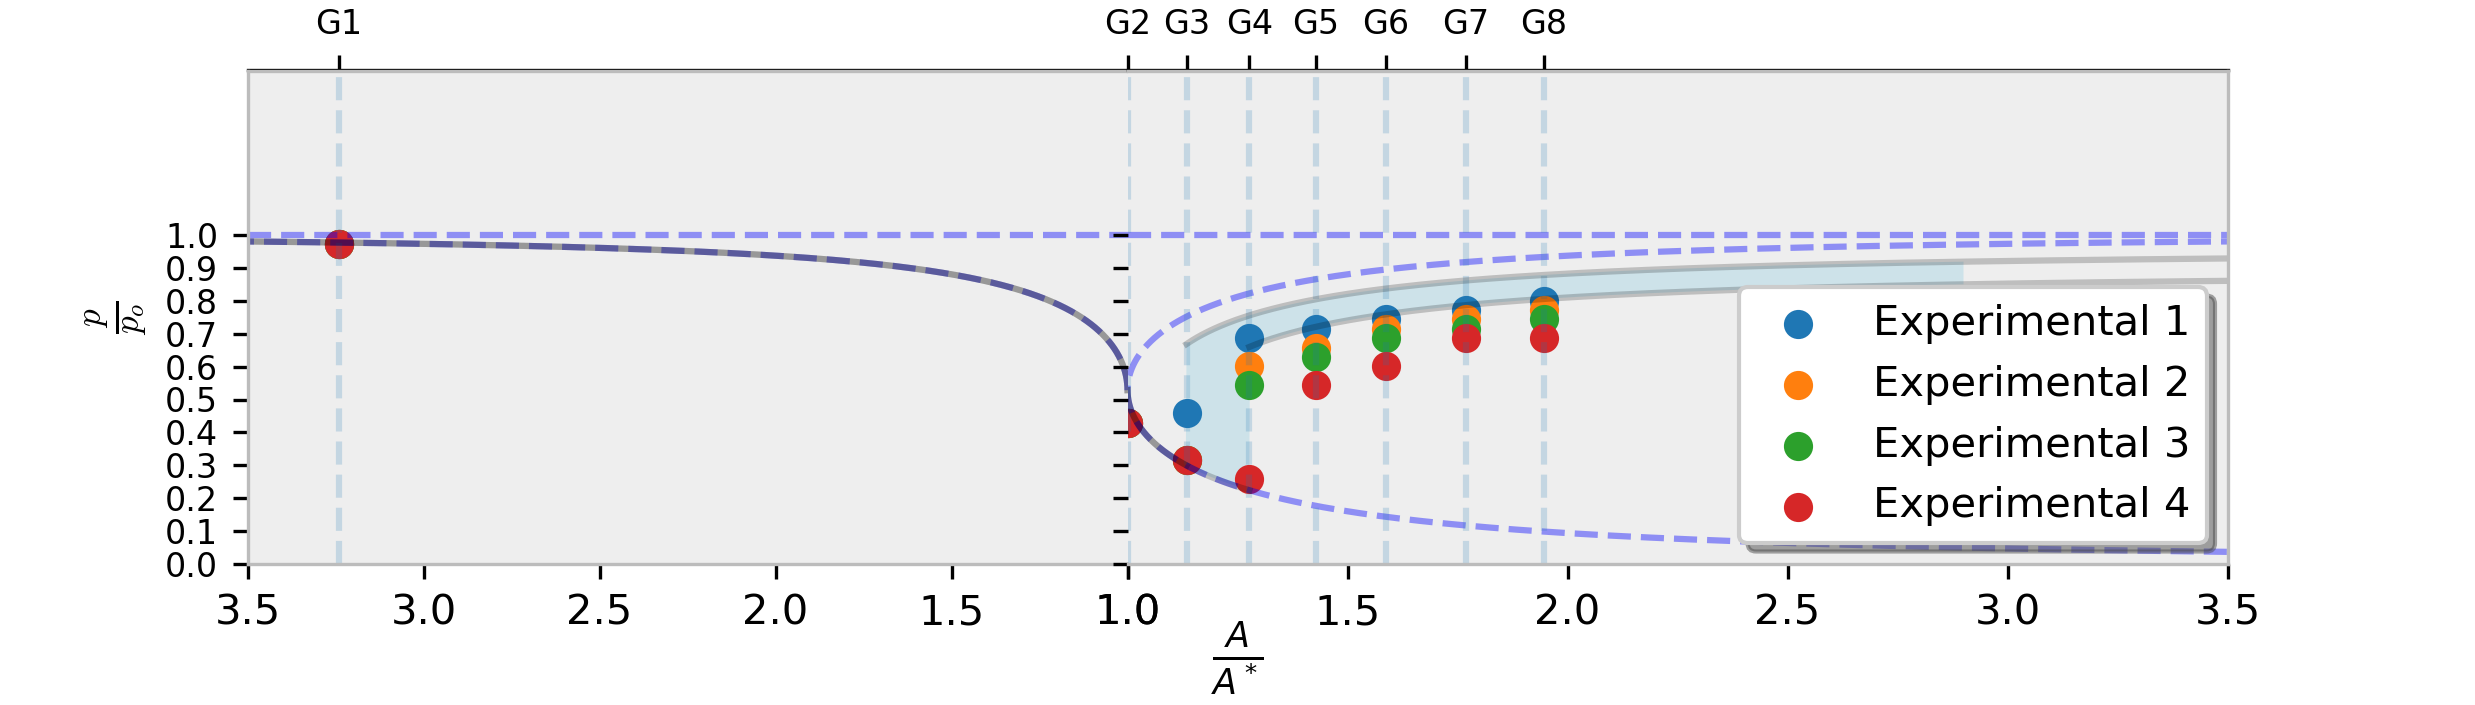

In [49]:
series_number = 1
series_selector = f"Series_{series_number}"
first_shock = 3
second_shock = first_shock + 1
label_selector = f"NS{first_shock}{second_shock}"

plot_maker(series_selector, first_shock, second_shock, label_selector)

3
1.134225
1.2768999999999997
0
[0.9667387327457175, 0.4345584566771994, 0.6673873274571761, 0.7339098619657409, 0.7671711292200232, 0.8004323964743056, 0.8336936637285881, 0.8336936637285881]
1
[0.9667387327457175, 0.4345584566771994, 0.4345584566771994, 0.6008647929486114, 0.7006485947114586, 0.7339098619657409, 0.7671711292200232, 0.8004323964743056]
       Rp_1      Rp_2      Rp_3      Rp_4      Rp_5      Rp_6      Rp_7  \
0  0.966739  0.434558  0.667387  0.733910  0.767171  0.800432  0.833694   
1  0.966739  0.434558  0.434558  0.600865  0.700649  0.733910  0.767171   

       Rp_8  
0  0.833694  
1  0.800432  
4
1.2768999999999997
1.4280250000000003
0
[0.9667387327457175, 0.4345584566771994, 0.30151338766006985, 0.46781972393148175, 0.6008647929486114, 0.6673873274571761, 0.7006485947114586, 0.7339098619657409]
1
[0.9667387327457175, 0.4345584566771994, 0.30151338766006985, 0.5343422584400466, 0.6341260602028937, 0.6673873274571761, 0.7006485947114586, 0.7339098619657409]
       

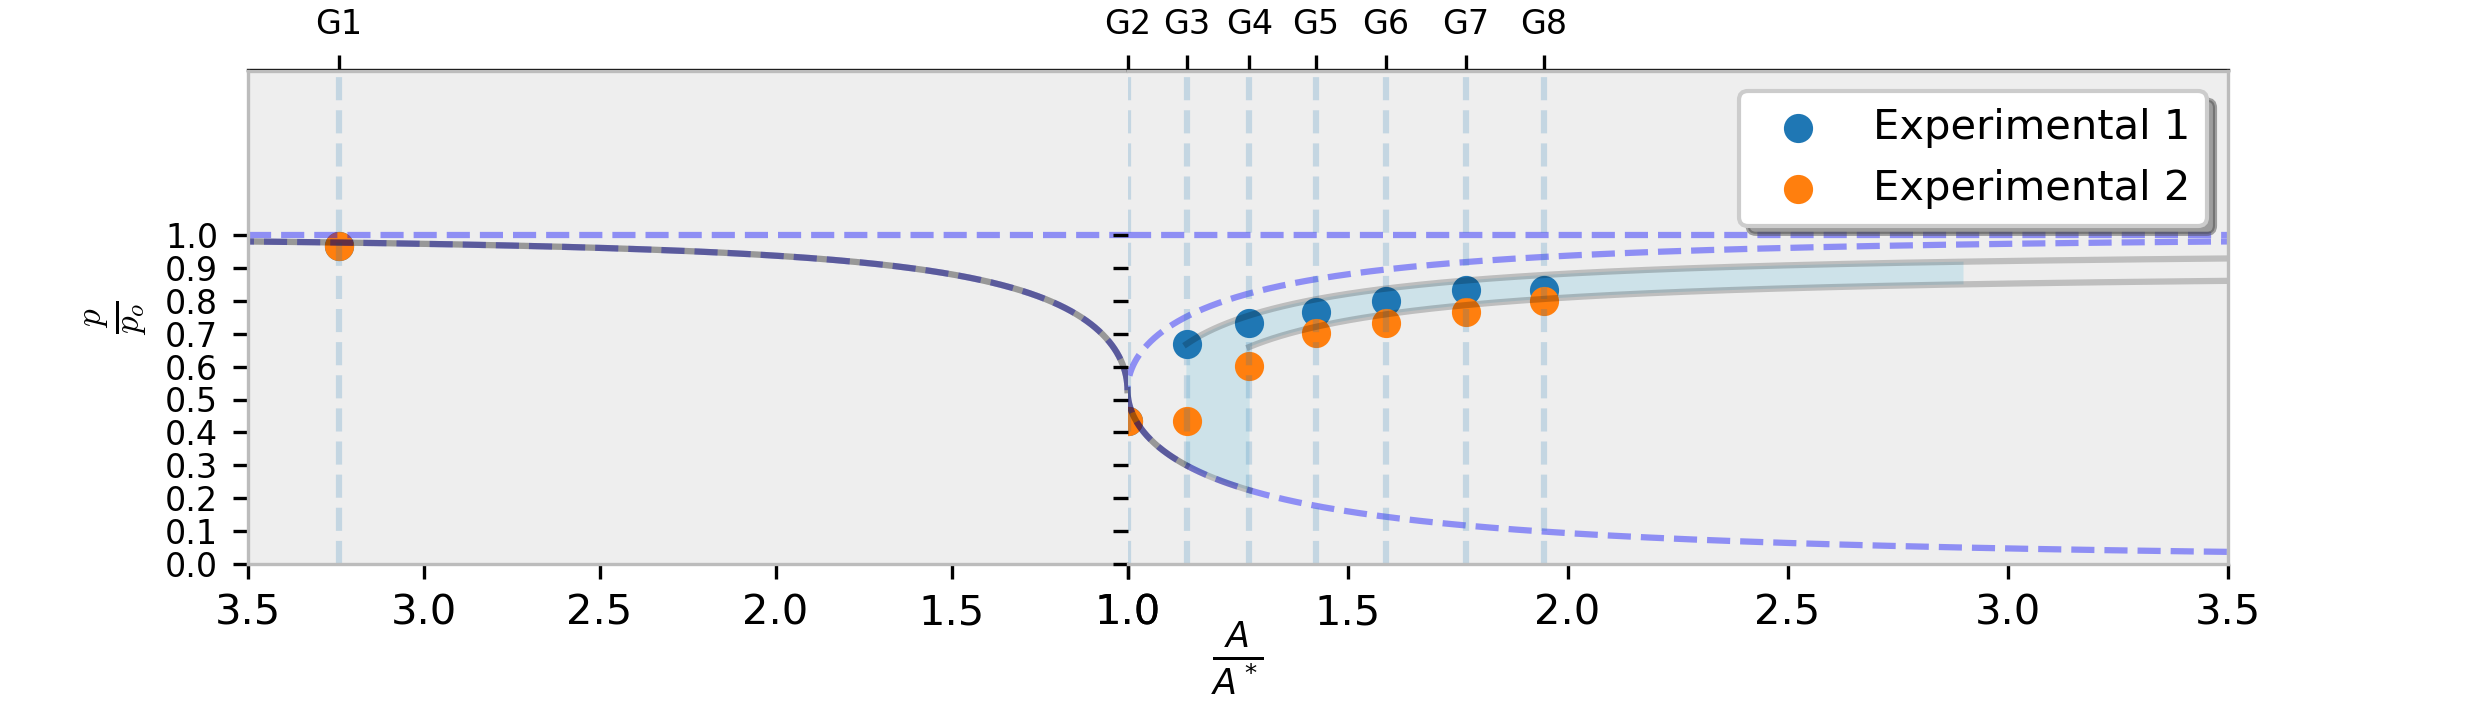

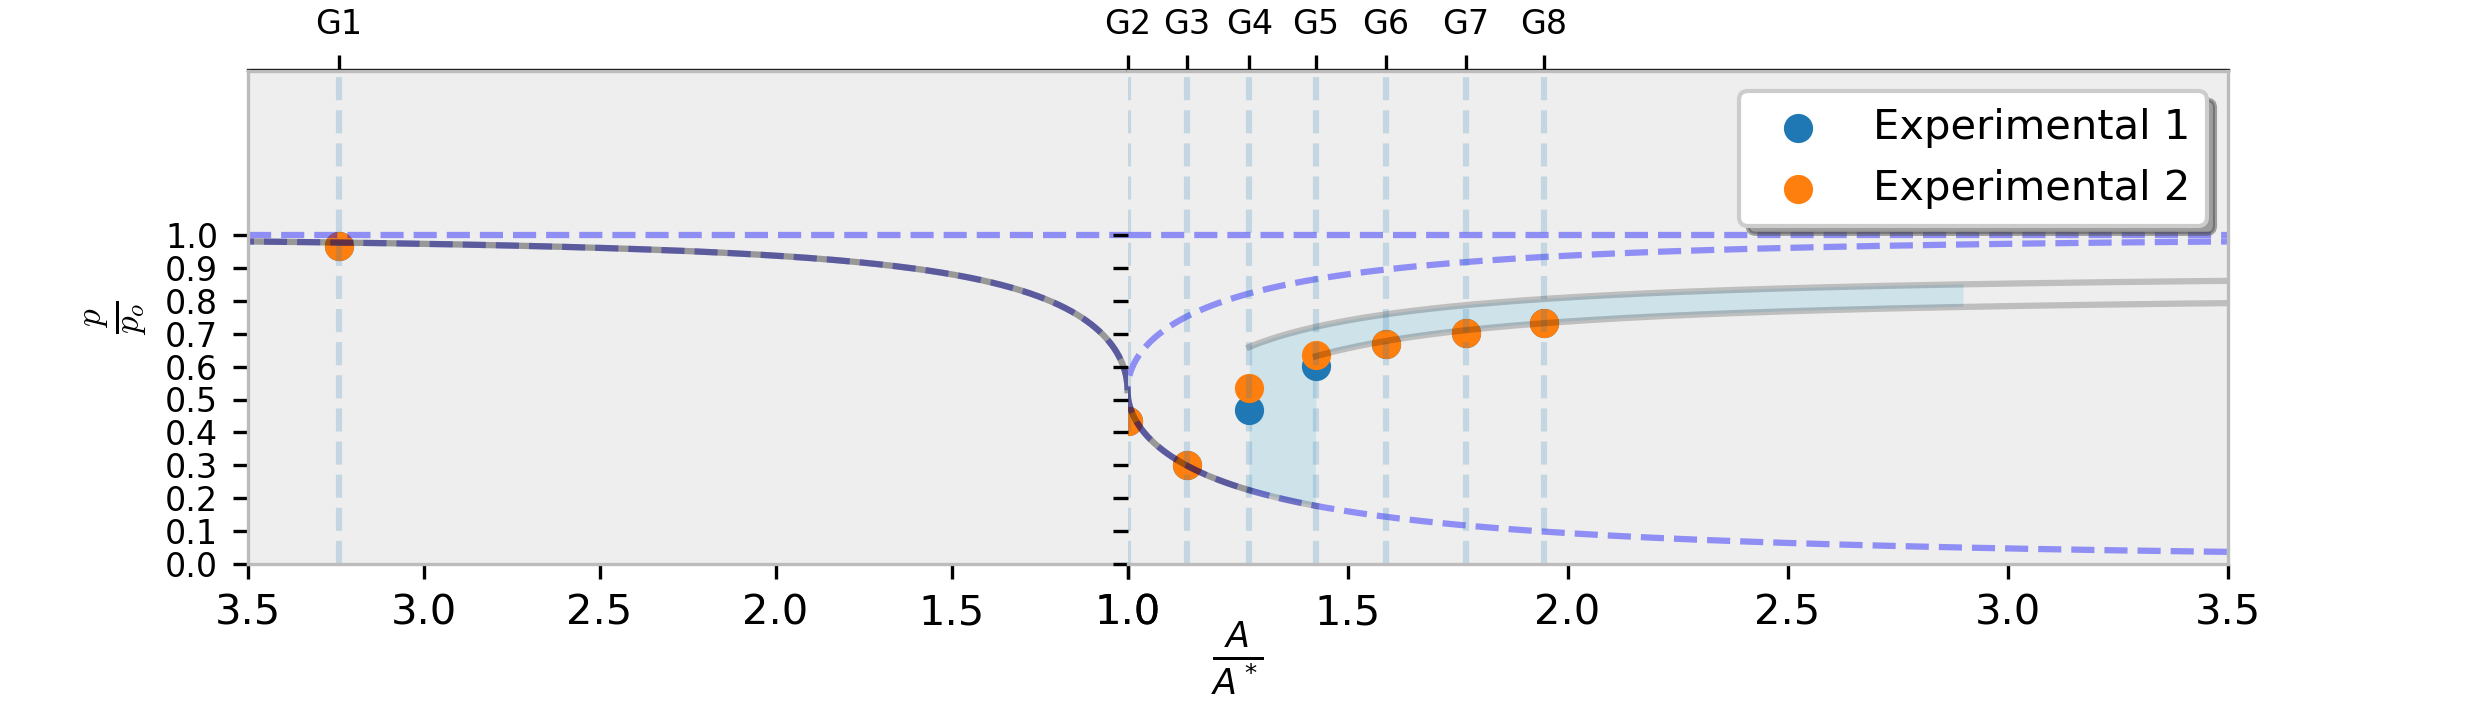

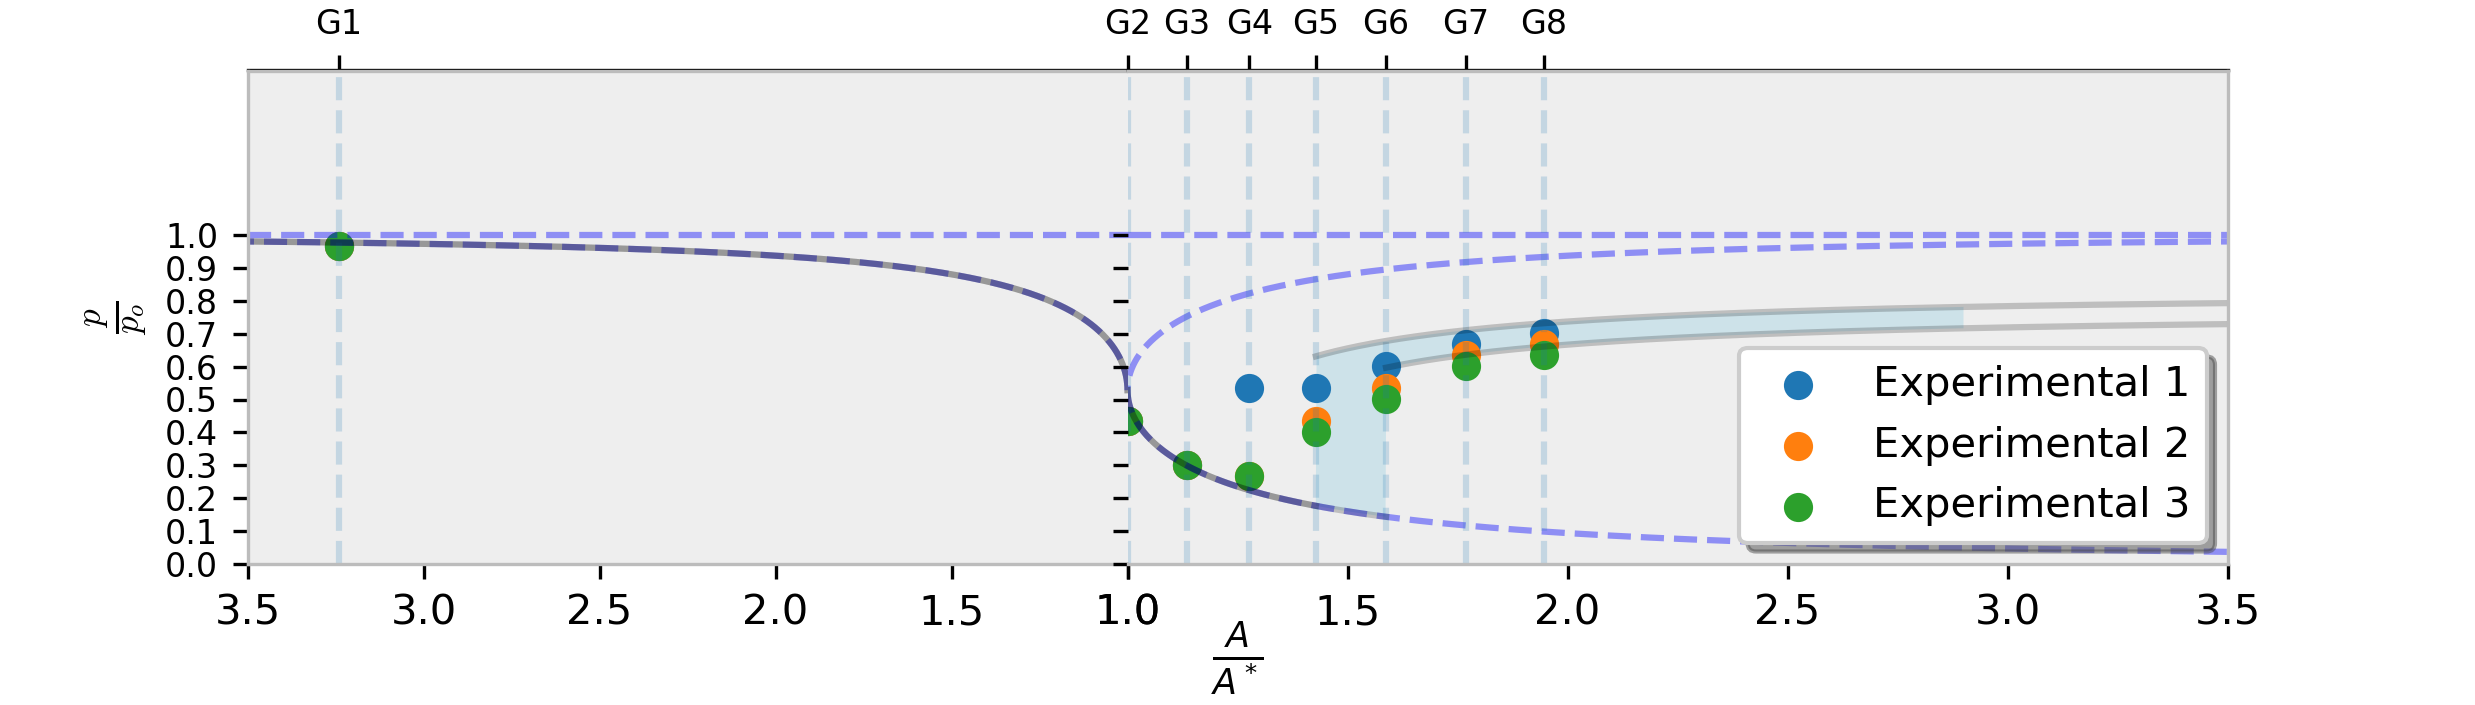

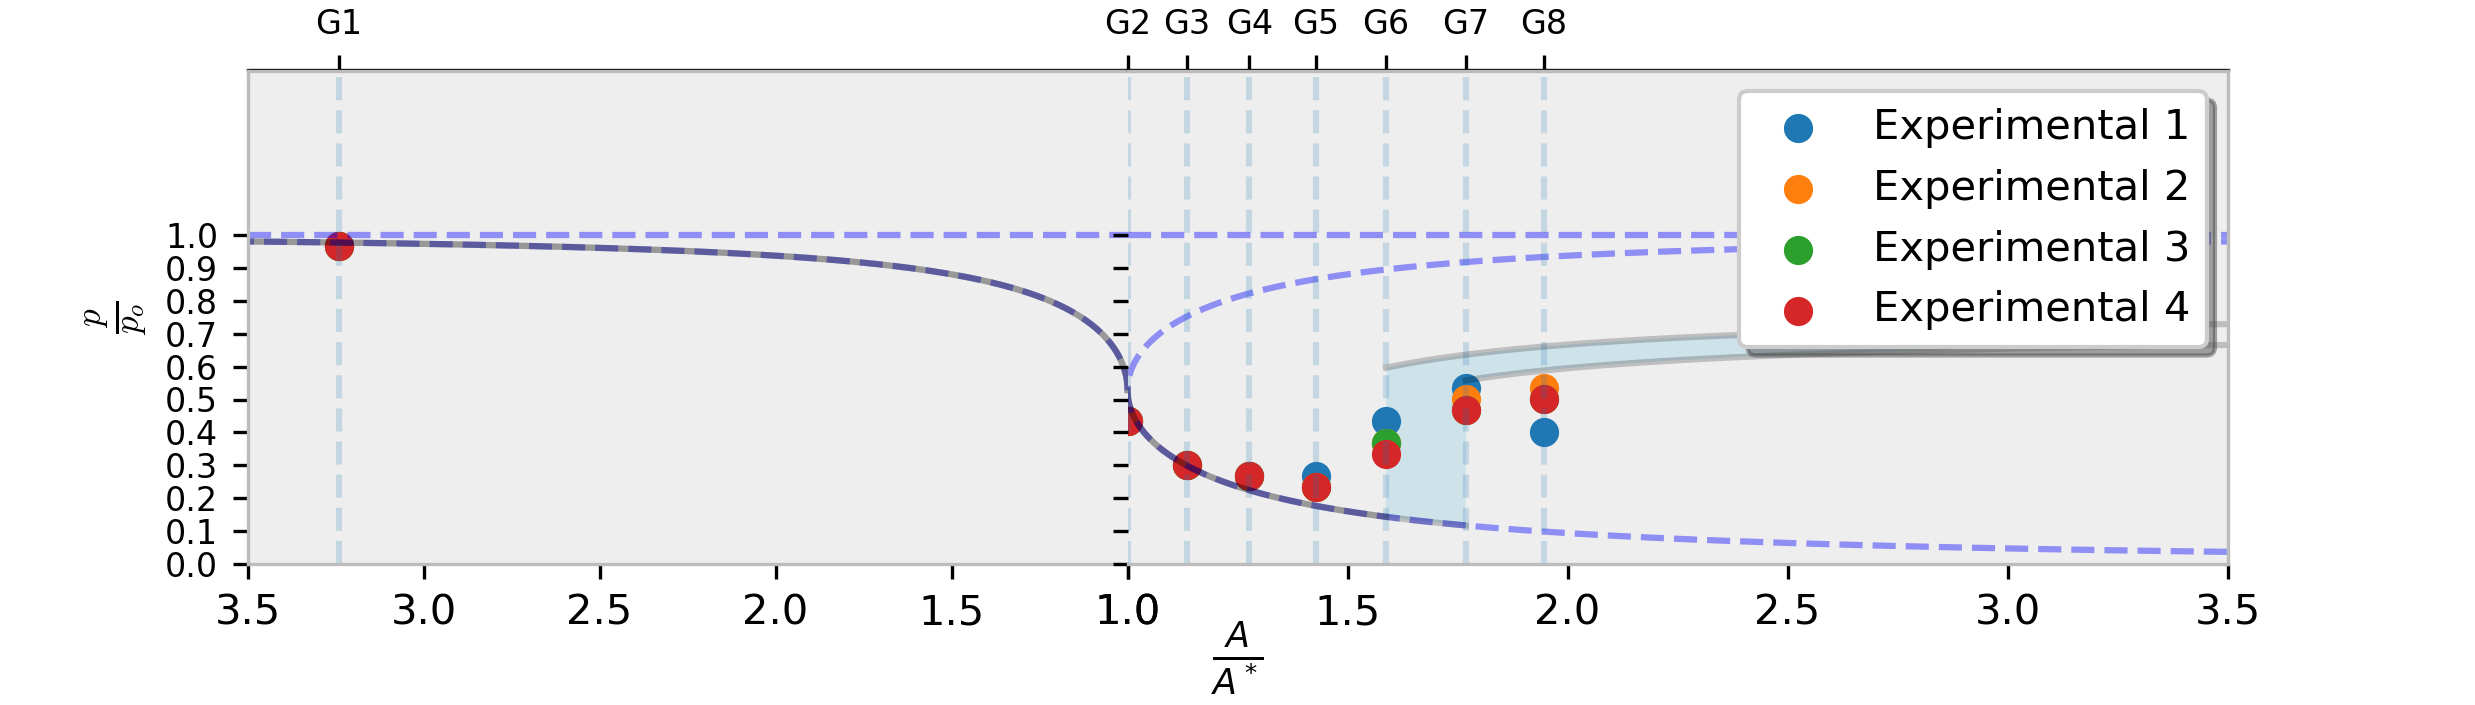

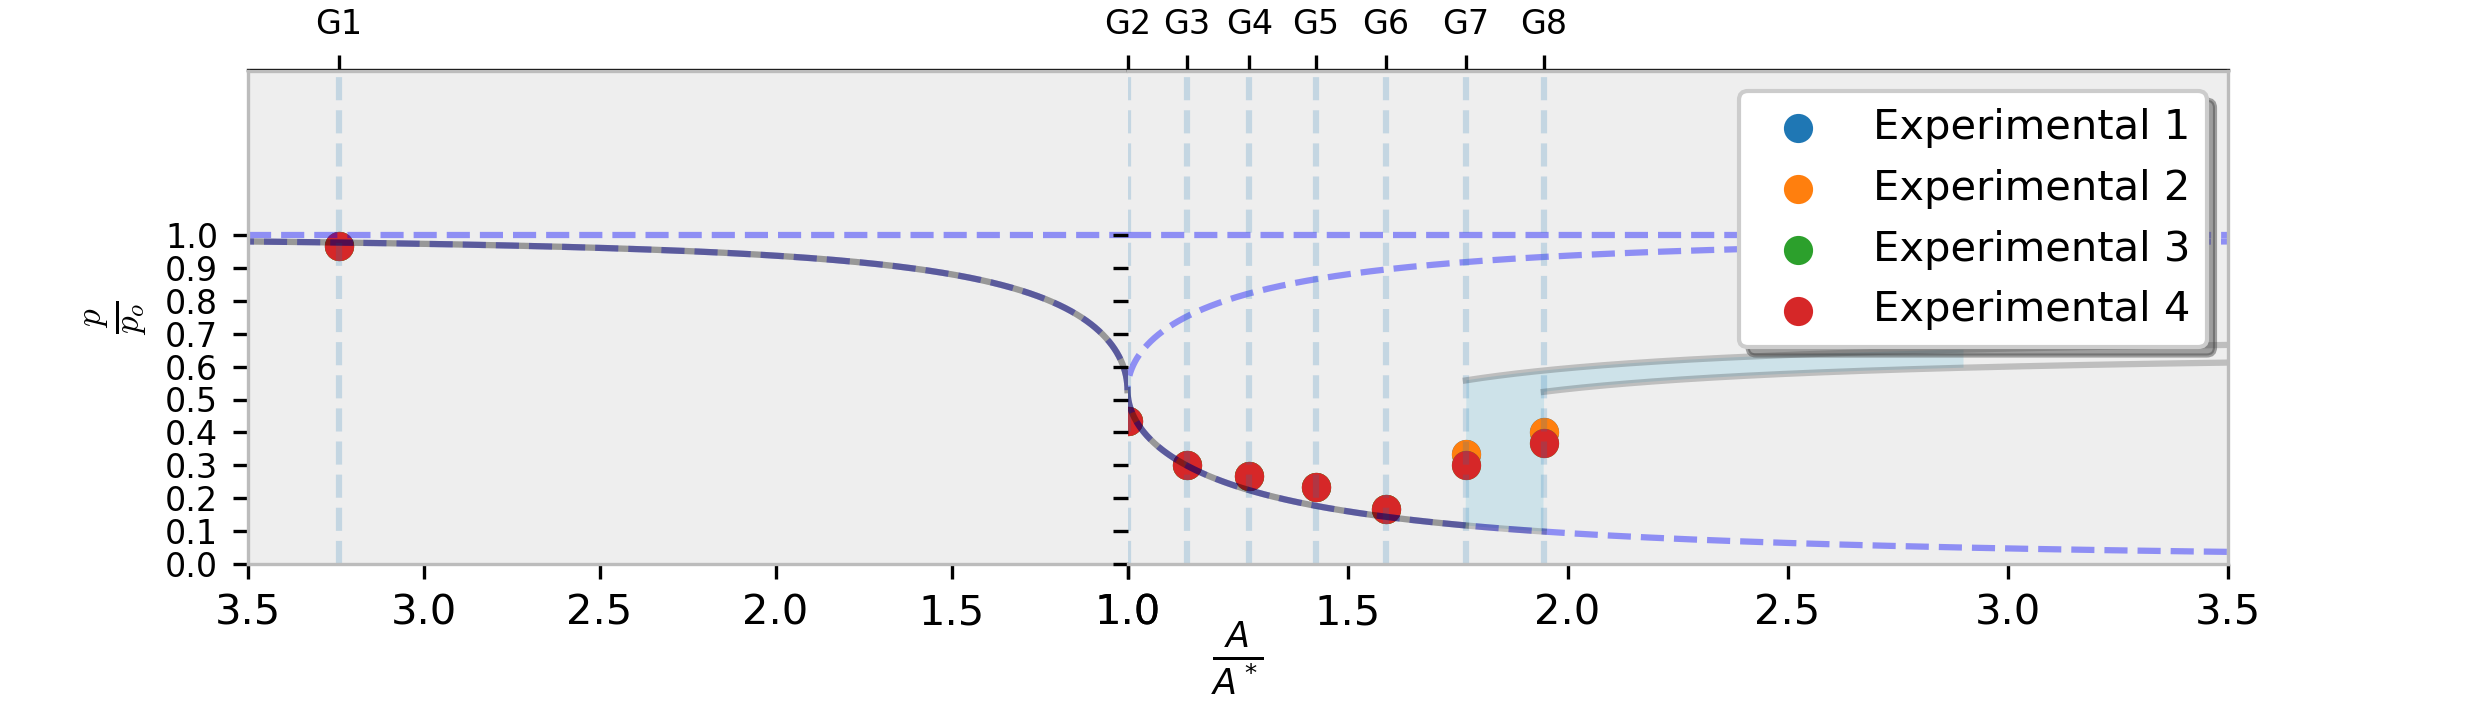

In [50]:

for i in range(3,8):
    series_number = 2
    series_selector = f"Series_{series_number}"
    first_shock = i
    second_shock = first_shock + 1
    label_selector = f"NS{first_shock-1}{second_shock-1}"
    
    print(i)

    plot_maker(series_selector, first_shock , second_shock, label_selector)

3
1.134225
1.2768999999999997
0
[0.971481534293455, 0.45814915157564523, 0.7148153429345501, 0.7433338086410951, 0.8003707400541851, 0.82888920576073, 0.857407671467275, 0.857407671467275]
1
[0.971481534293455, 0.42963068586910025, 0.6577784115214601, 0.7433338086410951, 0.7718522743476401, 0.8003707400541851, 0.82888920576073, 0.82888920576073]
       Rp_1      Rp_2      Rp_3      Rp_4      Rp_5      Rp_6      Rp_7  \
0  0.971482  0.458149  0.714815  0.743334  0.800371  0.828889  0.857408   
1  0.971482  0.429631  0.657778  0.743334  0.771852  0.800371  0.828889   

       Rp_8  
0  0.857408  
1  0.828889  
4
1.2768999999999997
1.4280250000000003
0
[0.971481534293455, 0.42963068586910025, 0.45814915157564523, 0.6862968772280051, 0.7148153429345501, 0.7433338086410951, 0.7718522743476401, 0.8003707400541851]
1
[0.971481534293455, 0.42963068586910025, 0.3155568230429203, 0.6007414801083701, 0.6577784115214601, 0.7148153429345501, 0.7433338086410951, 0.7718522743476401]
2
[0.971481534293

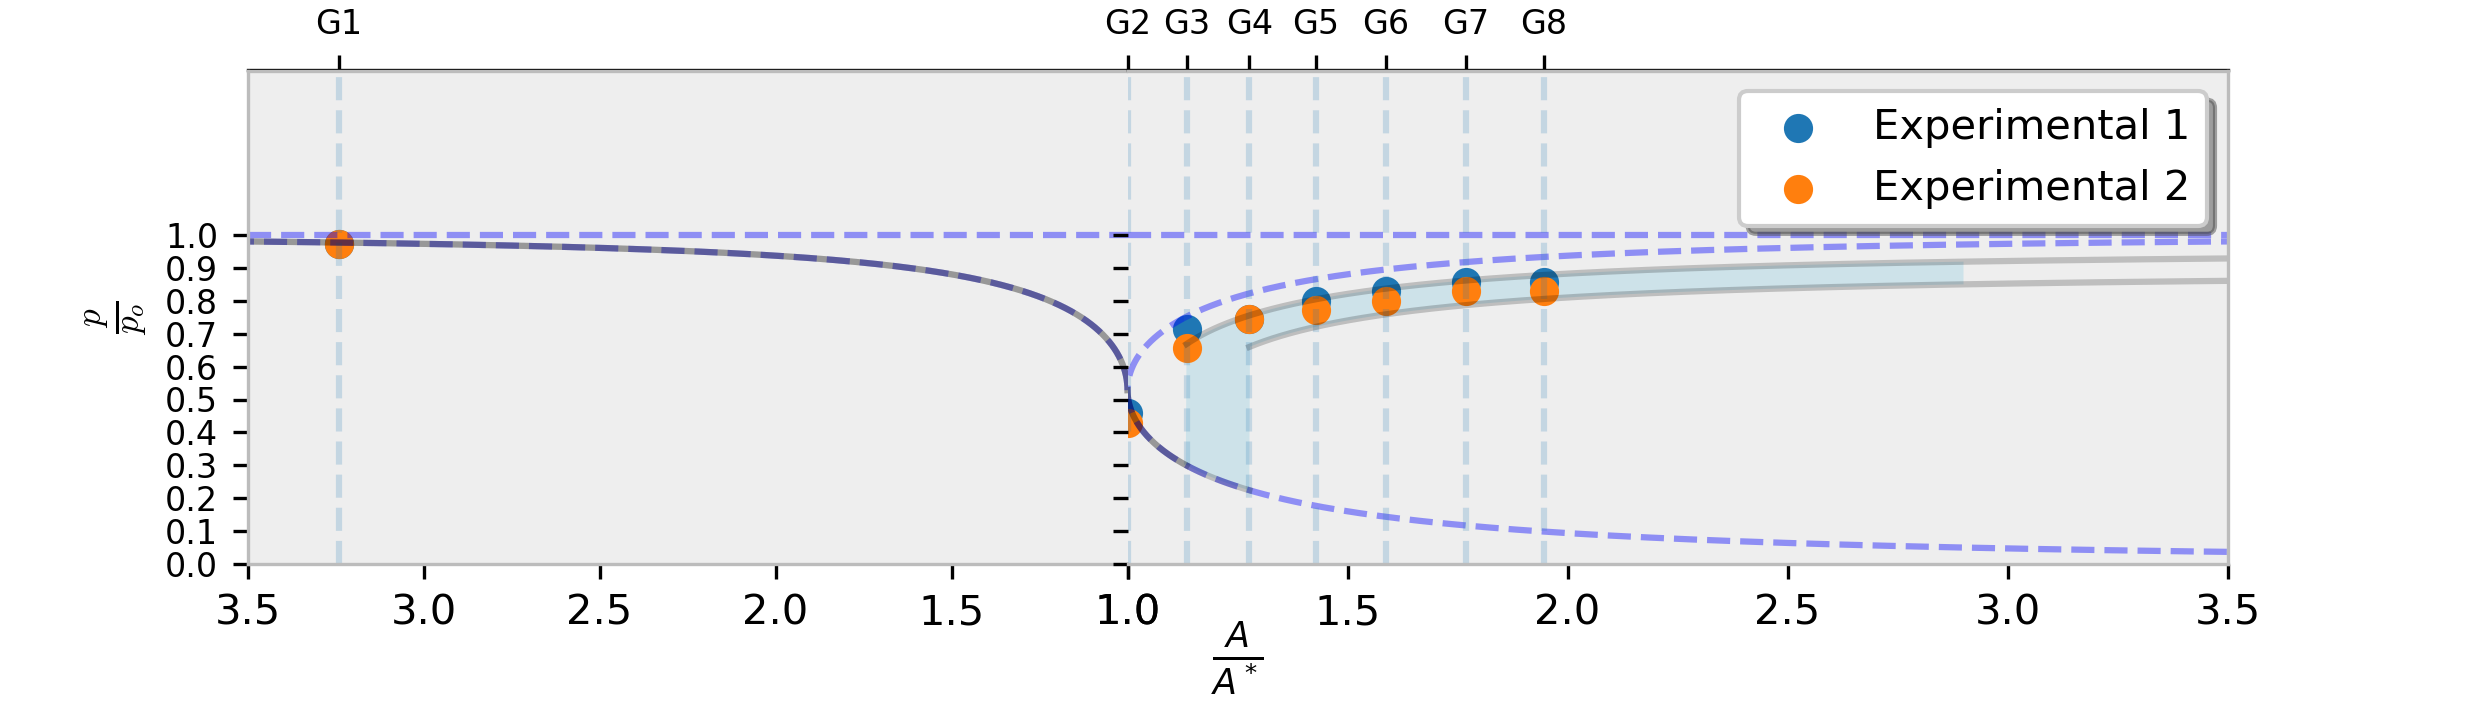

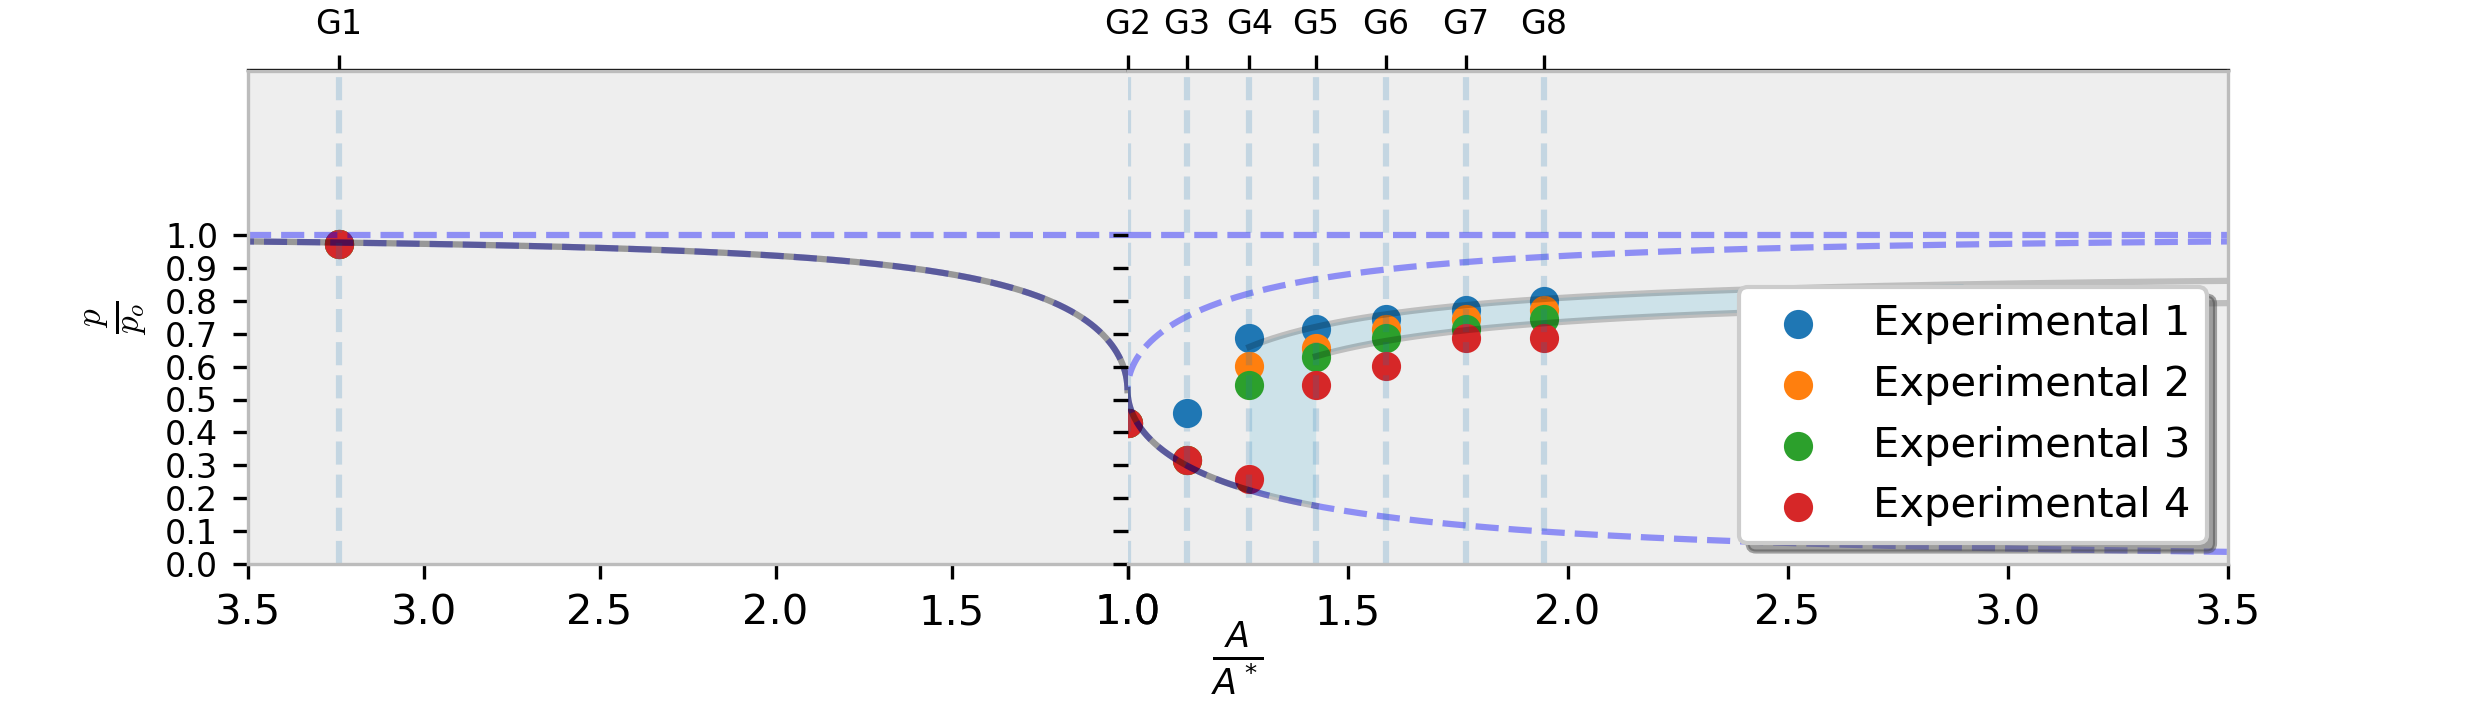

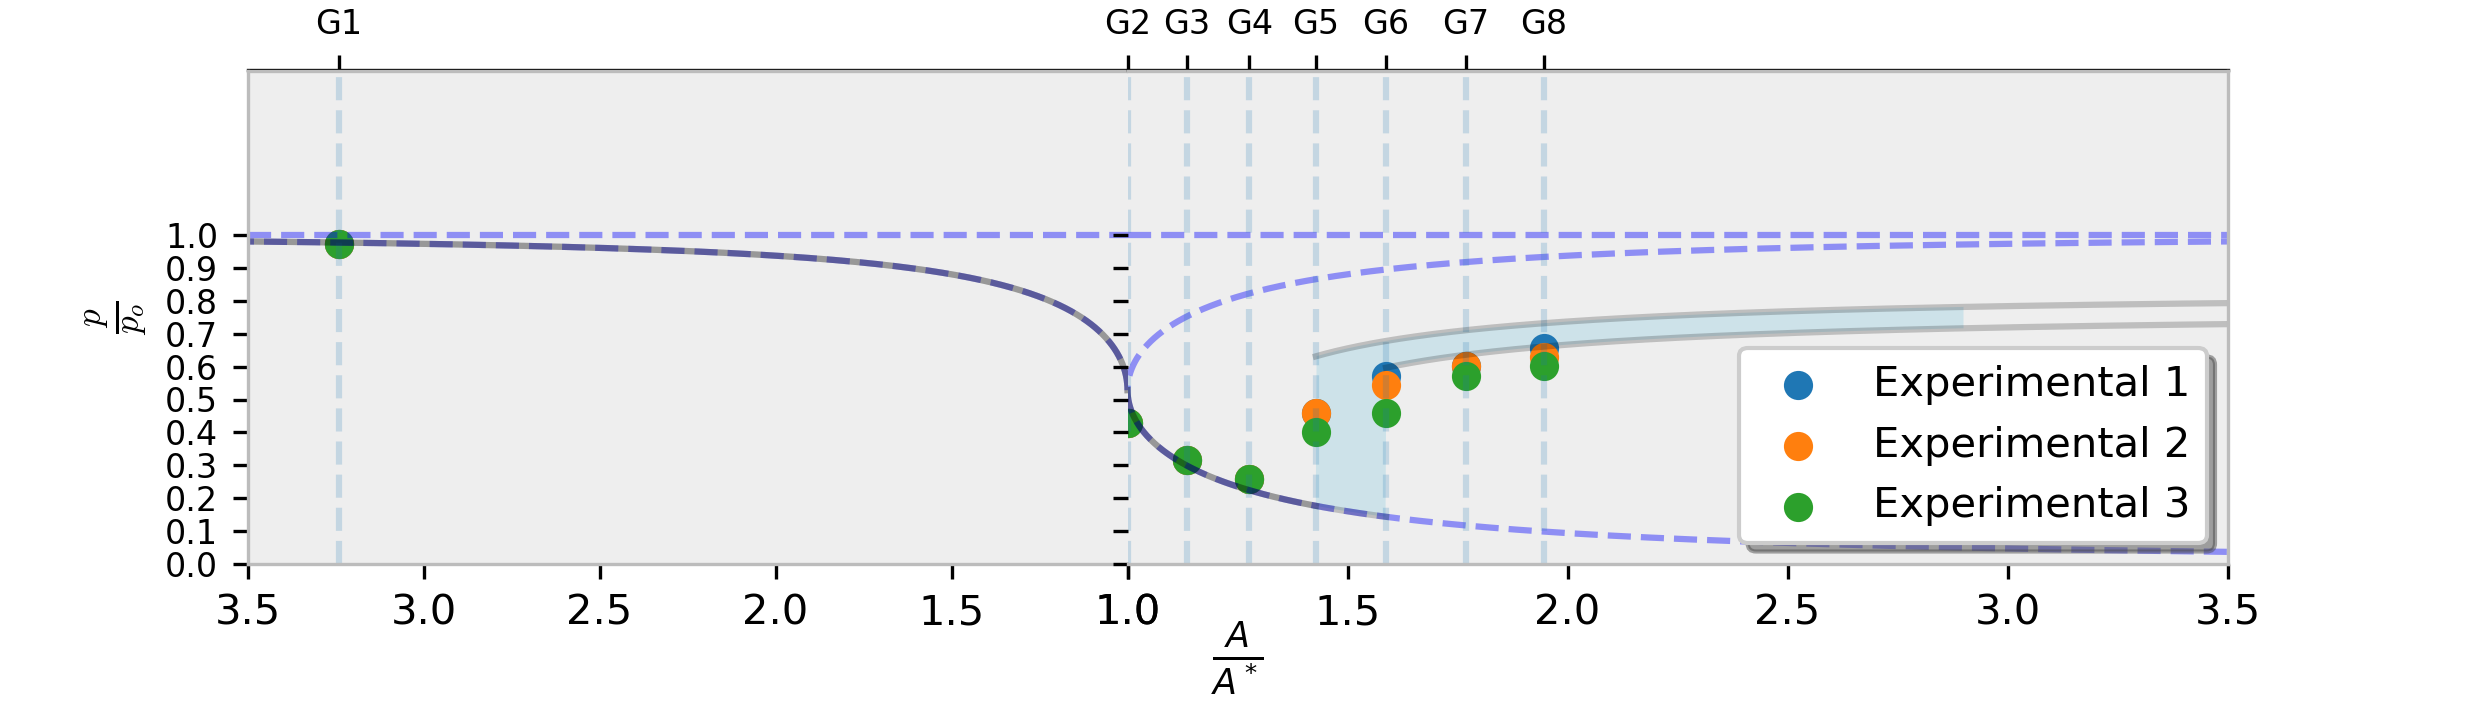

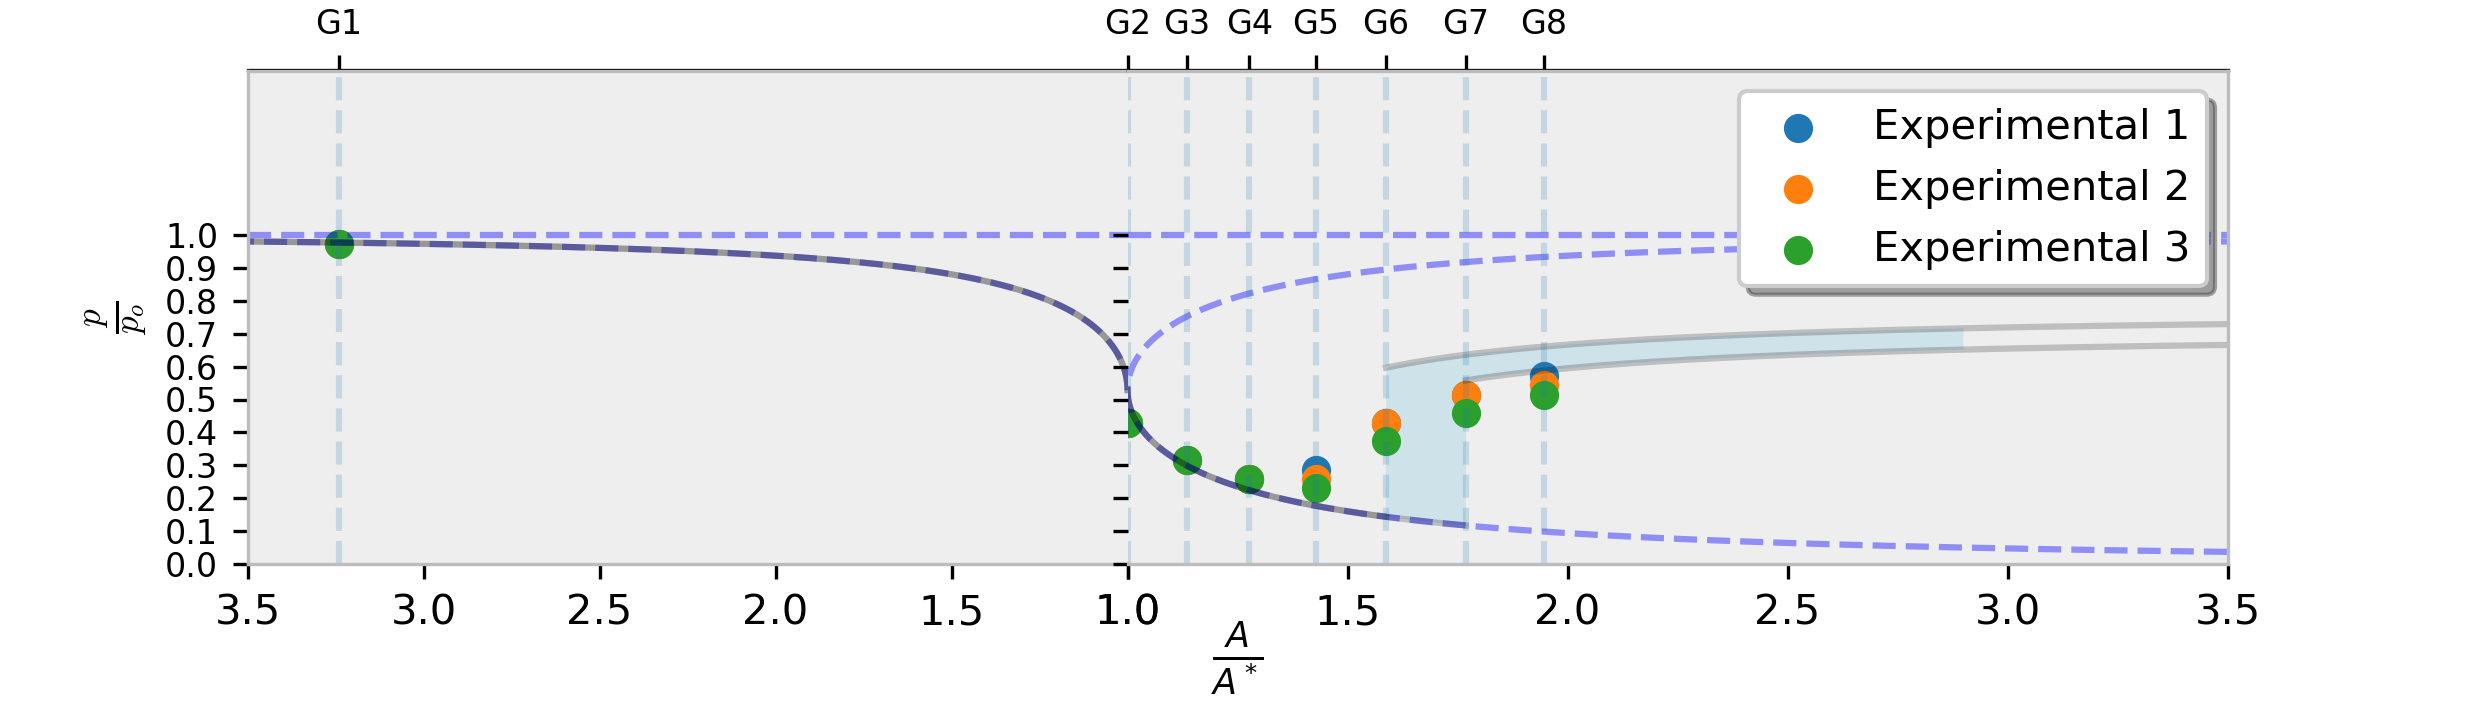

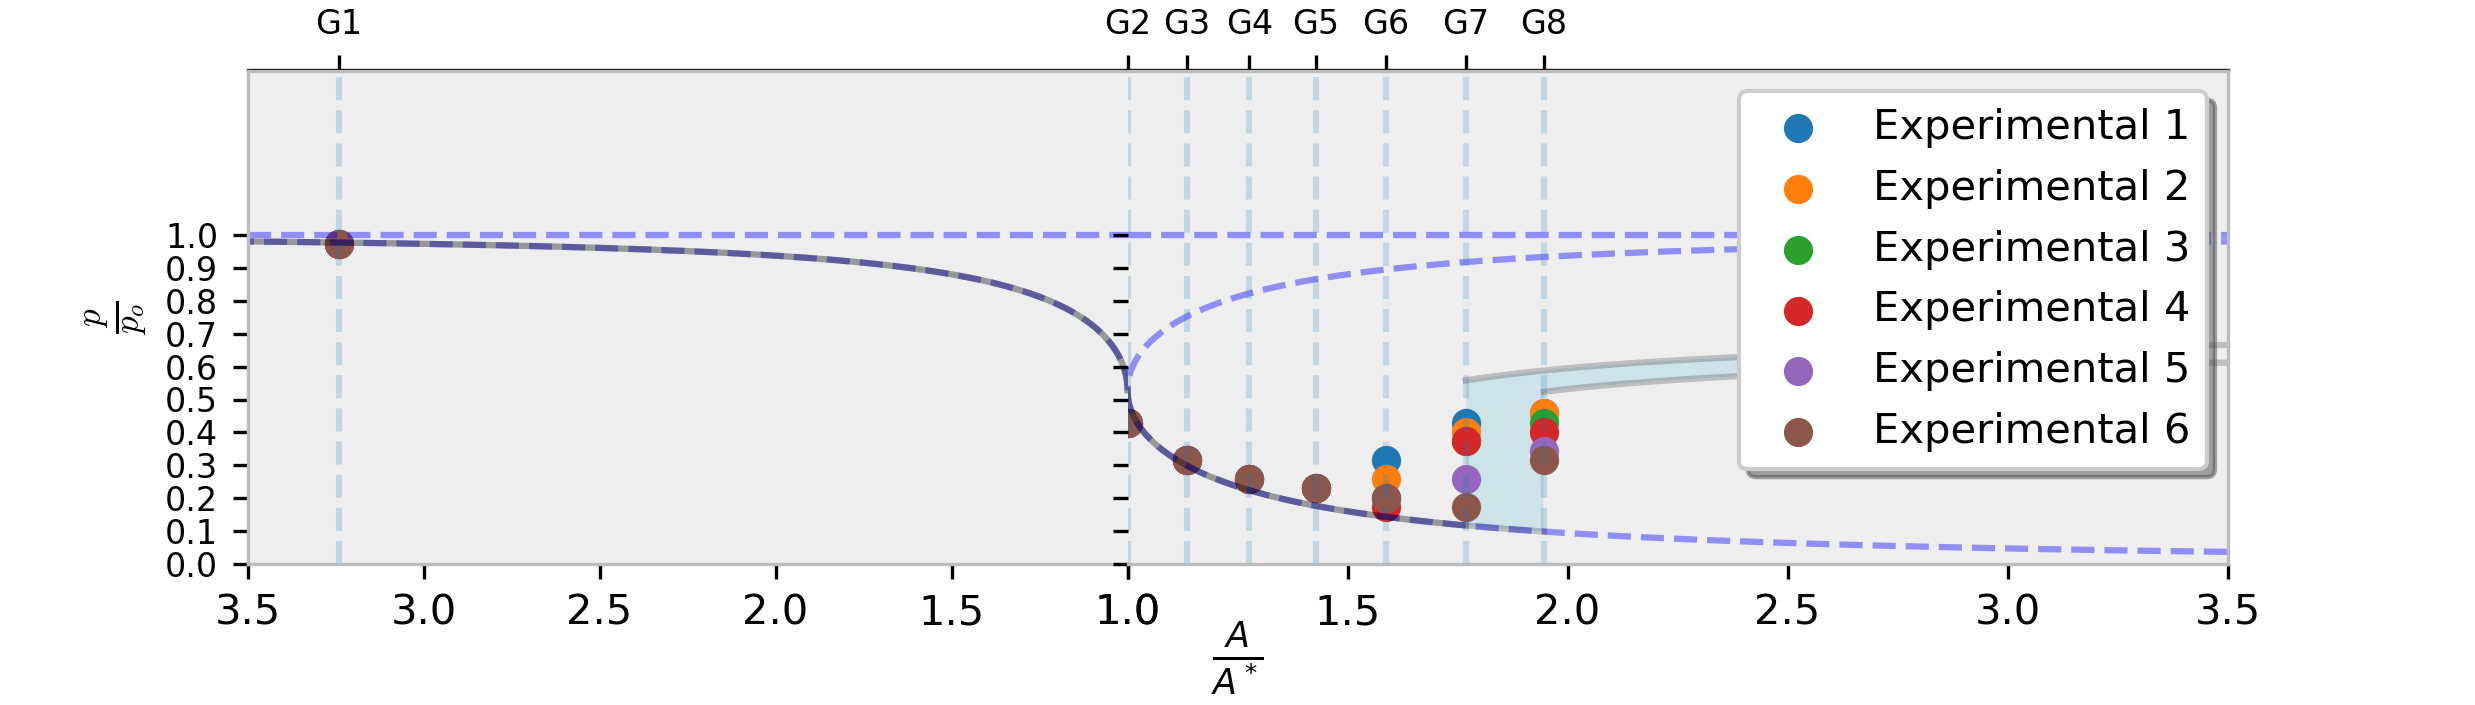

In [51]:

for i in range(3,8):
    series_number = 1
    series_selector = f"Series_{series_number}"
    first_shock = i
    second_shock = first_shock + 1
    label_selector = f"NS{first_shock-1}{second_shock-1}"
    
    print(i)

    plot_maker(series_selector, first_shock , second_shock, label_selector)

In [52]:
print("done")

done
